In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

%matplotlib inline

import sklearn.metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,plot_roc_curve,f1_score,precision_score,recall_score
from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from sklearn.metrics import plot_roc_curve
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data

df_tchurn = pd.read_csv("telecom_churn_data.csv")
df_tchurn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df_tchurn.shape

(99999, 226)

In [4]:
df_tchurn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
df_tchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# Data Preparation (as suggested in Case Study)

In [6]:
# Dropping columns which are not useful

df_tchurn.drop(['mobile_number','circle_id'],1,inplace=True)

### Filtering High Value Customers

As suggested, filtering customers who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months (the good phase)

#### Filtering all recharge columns first

In [7]:
recharge_cols = df_tchurn.columns[df_tchurn.columns.str.contains('rech_data|rech_amt')]
recharge_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [8]:
# Finding NULL values in recharge columns

df_tchurn[recharge_cols].isnull().mean()*100

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

It is observed that NULL Value % for "date_of_last_rech_data", "total_rech_data", "max_rech_data", "av_rech_amt_data" in each respective month (6/7/8/9) is the same, i.e., 74.84%, 74.42%, 73.66%, 74.07% respectively.
So we can assume that no recharge has been done for same customers in this period and hence these NULL values can be imputed with 0.

In [9]:
df_tchurn['total_rech_data_6']=df_tchurn['total_rech_data_6'].fillna(0)
df_tchurn['total_rech_data_7']=df_tchurn['total_rech_data_7'].fillna(0)
df_tchurn['total_rech_data_8']=df_tchurn['total_rech_data_8'].fillna(0)
df_tchurn['total_rech_data_9']=df_tchurn['total_rech_data_9'].fillna(0)
df_tchurn['date_of_last_rech_data_6']=df_tchurn['date_of_last_rech_data_6'].fillna(0)
df_tchurn['date_of_last_rech_data_7']=df_tchurn['date_of_last_rech_data_7'].fillna(0)
df_tchurn['date_of_last_rech_data_8']=df_tchurn['date_of_last_rech_data_8'].fillna(0)
df_tchurn['date_of_last_rech_data_9']=df_tchurn['date_of_last_rech_data_9'].fillna(0)
df_tchurn['max_rech_data_6']=df_tchurn['max_rech_data_6'].fillna(0)
df_tchurn['max_rech_data_7']=df_tchurn['max_rech_data_7'].fillna(0)
df_tchurn['max_rech_data_8']=df_tchurn['max_rech_data_8'].fillna(0)
df_tchurn['max_rech_data_9']=df_tchurn['max_rech_data_9'].fillna(0)
df_tchurn['av_rech_amt_data_6']=df_tchurn['av_rech_amt_data_6'].fillna(0)
df_tchurn['av_rech_amt_data_7']=df_tchurn['av_rech_amt_data_7'].fillna(0)
df_tchurn['av_rech_amt_data_8']=df_tchurn['av_rech_amt_data_8'].fillna(0)
df_tchurn['av_rech_amt_data_9']=df_tchurn['av_rech_amt_data_9'].fillna(0)

#### For High Value customer filter, we need total Data recharge amount. Adding a new column to get the same by multiplying Average recharge amount with Number of recharges in a specific month

In [10]:
df_tchurn['total_data_recharge_amt_6'] = df_tchurn['av_rech_amt_data_6'] * df_tchurn['total_rech_data_6']
df_tchurn['total_data_recharge_amt_7'] = df_tchurn['av_rech_amt_data_7'] * df_tchurn['total_rech_data_7']
df_tchurn['total_data_recharge_amt_8'] = df_tchurn['av_rech_amt_data_8'] * df_tchurn['total_rech_data_8']
df_tchurn['total_data_recharge_amt_9'] = df_tchurn['av_rech_amt_data_9'] * df_tchurn['total_rech_data_9']

#### Dropping columns to avoid multi collinearity

In [11]:
df_tchurn.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

#### Finding average recharge amount in first 2 months i.e., June and July (the good phase)

In [12]:
avg_recharge_6_7 = (df_tchurn['total_rech_amt_6'].fillna(0) + df_tchurn['total_rech_amt_7'].fillna(0) 
+ df_tchurn['total_data_recharge_amt_6'].fillna(0) + df_tchurn['total_data_recharge_amt_7'].fillna(0))/2

#### Taking 70th percentile of the above calculated average amount

In [13]:
percentile_70_6_7 = np.percentile(avg_recharge_6_7, 70.0)

print("70th percentile is : ", percentile_70_6_7)

70th percentile is :  478.0


#### Filtering High Value customer data based on calculated 70th percentile

In [14]:
HighValue_cust = df_tchurn[avg_recharge_6_7 >= percentile_70_6_7]

HighValue_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_recharge_amt_6,total_data_recharge_amt_7,total_data_recharge_amt_8,total_data_recharge_amt_9
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,2

In [15]:
HighValue_cust.shape   # To check if we are getting above 30k rows

(30001, 220)

Here we are getting above 30k rows as mentioned in the guildelines.

#### Filtering the 9th month columns from High Value customer data for further analysis (as suggested)

In [16]:
month_9th = list(filter(lambda x:'_9' in x,list(HighValue_cust.columns)))

In [17]:
month_9th

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_data_rec

### Finding the Target Variable "Churn" from the 9th month data, from suggested attributes. Here, 1 = churn, and 0 = non churn

In [18]:
HighValue_cust['churn'] = np.where(HighValue_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

HighValue_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_recharge_amt_6,total_data_recharge_amt_7,total_data_recharge_amt_8,total_data_recharge_amt_9,churn
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252

#### After tagging churners, as suggested, removing all the attributes of 9th month (churn phase)

In [19]:
HighValue_cust.drop(month_9th,1,inplace=True)

In [20]:
HighValue_cust.shape

(30001, 168)

In [21]:
# Checking class imbalance for Churn variable

HighValue_cust['churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

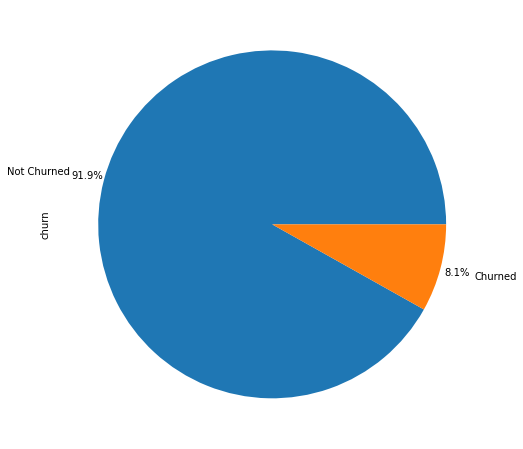

In [22]:
plt.figure(figsize=(10,5))
(HighValue_cust['churn'].value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, figsize = (8,8), labels = ["Not Churned", "Churned"])

plt.show()

- Churn variable is highly imbalanced. 
- Churned customers make up only 8.14% of the data
- Non-churned customers make up the remaining 91.86% of the data

To balance this, will use "class_weight" during modeling

## Data Cleaning

### Missing Values cleanup and dropping columns

In [23]:
missing_vals = (HighValue_cust.isnull().mean()*100).sort_values(ascending=False)
missing_vals

fb_user_8                    46.825106
night_pck_user_8             46.825106
count_rech_3g_8              46.825106
arpu_2g_8                    46.825106
count_rech_2g_8              46.825106
arpu_3g_8                    46.825106
count_rech_2g_6              44.148528
arpu_3g_6                    44.148528
fb_user_6                    44.148528
night_pck_user_6             44.148528
count_rech_3g_6              44.148528
arpu_2g_6                    44.148528
arpu_2g_7                    43.145228
count_rech_3g_7              43.145228
count_rech_2g_7              43.145228
night_pck_user_7             43.145228
fb_user_7                    43.145228
arpu_3g_7                    43.145228
og_others_8                   3.913203
std_og_t2f_mou_8              3.913203
spl_og_mou_8                  3.913203
std_og_mou_8                  3.913203
std_og_t2c_mou_8              3.913203
loc_ic_t2m_mou_8              3.913203
loc_ic_t2t_mou_8              3.913203
std_ic_mou_8             

### Dropping columns with more than 40% of missing values

In [24]:
drop_cols = missing_vals[missing_vals.values>40].index
drop_cols

Index(['fb_user_8', 'night_pck_user_8', 'count_rech_3g_8', 'arpu_2g_8',
       'count_rech_2g_8', 'arpu_3g_8', 'count_rech_2g_6', 'arpu_3g_6',
       'fb_user_6', 'night_pck_user_6', 'count_rech_3g_6', 'arpu_2g_6',
       'arpu_2g_7', 'count_rech_3g_7', 'count_rech_2g_7', 'night_pck_user_7',
       'fb_user_7', 'arpu_3g_7'],
      dtype='object')

In [25]:
HighValue_cust.drop(drop_cols,1,inplace=True)
HighValue_cust.shape

(30001, 150)

In [26]:
# Dropping the columns with unique values

unique = HighValue_cust.nunique() == 1
unique_values = [i for i, x in enumerate(unique) if x]
HighValue_cust.iloc[:,unique_values].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,0.0,NaN,NaN,0.0
7,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Dropping date columns as those are not required

date_cols=list(filter(lambda x:'date' in x,list(HighValue_cust.columns)))

HighValue_cust.drop(date_cols,1,inplace=True)

In [28]:
HighValue_cust.shape

(30001, 141)

In [29]:
(HighValue_cust.isnull().mean()*100).sort_values(ascending=False)

std_ic_mou_8                 3.913203
loc_og_t2t_mou_8             3.913203
loc_og_t2f_mou_8             3.913203
std_ic_t2m_mou_8             3.913203
loc_og_t2c_mou_8             3.913203
loc_ic_t2m_mou_8             3.913203
std_og_t2t_mou_8             3.913203
std_ic_t2t_mou_8             3.913203
std_og_t2m_mou_8             3.913203
std_og_t2f_mou_8             3.913203
std_og_t2c_mou_8             3.913203
std_og_mou_8                 3.913203
loc_ic_mou_8                 3.913203
isd_og_mou_8                 3.913203
spl_og_mou_8                 3.913203
og_others_8                  3.913203
loc_ic_t2f_mou_8             3.913203
spl_ic_mou_8                 3.913203
loc_ic_t2t_mou_8             3.913203
loc_og_t2m_mou_8             3.913203
loc_og_mou_8                 3.913203
roam_ic_mou_8                3.913203
std_ic_t2f_mou_8             3.913203
offnet_mou_8                 3.913203
ic_others_8                  3.913203
roam_og_mou_8                3.913203
isd_ic_mou_8

Now the missing values can be seen mostly in Minutes of Usage (mou) columns, which means there was no usage by customer. Hence we can impute these missing values with 0.

In [30]:
HighValue_cust=HighValue_cust.fillna(0)

In [31]:
(HighValue_cust.isnull().mean()*100).sort_values(ascending=False)

loc_og_t2o_mou               0.0
ic_others_7                  0.0
spl_ic_mou_7                 0.0
spl_ic_mou_8                 0.0
isd_ic_mou_6                 0.0
isd_ic_mou_7                 0.0
isd_ic_mou_8                 0.0
ic_others_6                  0.0
ic_others_8                  0.0
total_ic_mou_8               0.0
total_rech_num_6             0.0
total_rech_num_7             0.0
total_rech_num_8             0.0
total_rech_amt_6             0.0
total_rech_amt_7             0.0
total_rech_amt_8             0.0
spl_ic_mou_6                 0.0
total_ic_mou_7               0.0
loc_ic_mou_8                 0.0
std_ic_t2f_mou_7             0.0
std_ic_t2t_mou_7             0.0
std_ic_t2t_mou_8             0.0
std_ic_t2m_mou_6             0.0
std_ic_t2m_mou_7             0.0
std_ic_t2m_mou_8             0.0
std_ic_t2f_mou_6             0.0
std_ic_t2f_mou_8             0.0
total_ic_mou_6               0.0
std_ic_t2o_mou_6             0.0
std_ic_t2o_mou_7             0.0
std_ic_t2o

Now we have dealt with Missing Value cases

### Deriving new features

##### Taking average of Month 6 and Month 7 and deriving new columns for each feature. (good phase)

In [32]:
month_6 = []           # to store all the features with _6 in the end
month_7 = []           # store all the features with _7 in the end

for col in HighValue_cust.columns:
    if col.endswith('_6'):
        month_6.append(col)
    elif col.endswith('_7'):
        month_7.append(col)

print('Month 6')
print(month_6)         # print all the column names with _6 in the end

print('Month 7')
print(month_7)         # print all the column names with _7 in the end

Month 6
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'max_rech_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'total_data_recharge_amt_6']
Month 7
['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 's

In [33]:
# Remove "_6" from end, and add "_good_avg" in the end of new columns created for good phase

for i in range(0,len(month_6)): 
    HighValue_cust[month_6[i].rstrip('_6') + '_good_avg'] = (HighValue_cust[month_6[i]] + HighValue_cust[month_7[i]]) / 2

HighValue_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_recharge_amt_6,total_data_recharge_amt_7,total_data_recharge_amt_8,churn,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_t2f_mou_good_avg,std_og_t2c_mou_good_avg,std_og_mou_good_avg,isd_og_mou_good_avg,spl_og_mou_good_avg,og_others_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_t2o_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,isd_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,total_rech_amt_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,max_rech_data_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg,monthly_2g_good_avg,sachet_2g_good_avg,monthly_3g_good_avg,sachet_3g_good_avg,total_data_recharge_amt_good_avg
0,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.0,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,252.0
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453

#### Deriving new columns to identify decrease in values of attributes from Good Phase to Action Phase:
- "decrease_mou_action"
- "decrease_rech_num_action" 
- "decrease_rech_amt_action"
- "decrease_arpu_action"
- "decrease_vbc_action"

There columns will be dropped later

In [34]:
# decrease_mou_action -- to check drop in Minutes of Usage from good to action phase

# Avg mou at good phase incoming and outgoing (6 and 7 month)
HighValue_cust['avg_mou_good'] = (HighValue_cust['total_og_mou_6'] + HighValue_cust['total_ic_mou_6'] + HighValue_cust['total_og_mou_7'] + HighValue_cust['total_ic_mou_7'])/2

# Total mou at action phase (8 month)
HighValue_cust['total_mou_action'] = (HighValue_cust['total_og_mou_8'] + HighValue_cust['total_ic_mou_8'])

# Difference avg_mou_good and total_mou_action
HighValue_cust['diff_mou'] = HighValue_cust['total_mou_action'] - HighValue_cust['avg_mou_good']

# Checking whether the mou has decreased in action phase
HighValue_cust['decrease_mou_action'] = np.where((HighValue_cust['diff_mou'] < 0), 1, 0)

In [35]:
# decrease_rech_num_action" -- to check drop in number of recharge from good to action phase

# Avg rech number at good phase
HighValue_cust['avg_rech_num_good'] = (HighValue_cust['total_rech_num_6'] + HighValue_cust['total_rech_num_7'])/2

# Difference avg_rech_num_good and total_rech_num_8
HighValue_cust['diff_rech_num'] = HighValue_cust['total_rech_num_8'] - HighValue_cust['avg_rech_num_good']

# Checking if rech_num has decreased in action phase
HighValue_cust['decrease_rech_num_action'] = np.where((HighValue_cust['diff_rech_num'] < 0), 1, 0)

In [36]:
# "decrease_rech_amt_action" -- to check drop in recharge amount from good to action phase

# Avg rech_amt in good phase
HighValue_cust['avg_rech_amt_good'] = (HighValue_cust['total_rech_amt_6'] + HighValue_cust['total_rech_amt_7'])/2

# Difference of action phase rech amt and good phase rech amt
HighValue_cust['diff_rech_amt'] = HighValue_cust['total_rech_amt_8'] - HighValue_cust['avg_rech_amt_good']

# Checking if rech_amt has decreased in action phase
HighValue_cust['decrease_rech_amt_action'] = np.where((HighValue_cust['diff_rech_amt'] < 0), 1, 0)

In [37]:
# "decrease_arpu_action" -- to check drop in average revenue per customer from good to action phase

# ARPU in good phase
HighValue_cust['avg_arpu_good'] = (HighValue_cust['arpu_6'] + HighValue_cust['arpu_7'])/2

# Difference of good and action phase ARPU
HighValue_cust['diff_arpu'] = HighValue_cust['arpu_8'] - HighValue_cust['avg_arpu_good']

# Checking whether the arpu has decreased on the action month
HighValue_cust['decrease_arpu_action'] = np.where(HighValue_cust['diff_arpu'] < 0, 1, 0)

In [38]:
# "decrease_vbc_action" -- to check drop in volume based cost from good to action phase

# VBC in good phase
HighValue_cust['avg_vbc_3g_good'] = (HighValue_cust['jun_vbc_3g'] + HighValue_cust['jul_vbc_3g'])/2

# Difference of good and action phase VBC# Checking whether the VBC has decreased on the action month
HighValue_cust['diff_vbc'] = HighValue_cust['aug_vbc_3g'] - HighValue_cust['avg_vbc_3g_good']

# Checking whether the VBC has decreased on the action month
HighValue_cust['decrease_vbc_action'] = np.where(HighValue_cust['diff_vbc'] < 0 , 1, 0)

In [39]:
HighValue_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_recharge_amt_6,total_data_recharge_amt_7,total_data_recharge_amt_8,churn,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_t2f_mou_good_avg,std_og_t2c_mou_good_avg,std_og_mou_good_avg,isd_og_mou_good_avg,spl_og_mou_good_avg,og_others_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_t2o_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,isd_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,total_rech_amt_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,max_rech_data_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg,monthly_2g_good_avg,sachet_2g_good_avg,monthly_3g_good_avg,sachet_3g_good_avg,total_data_recharge_amt_good_avg,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
0,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.00

In [40]:
# Converting Age on Network in Years (duration for which customer is using the operator T network)

HighValue_cust['aon_years'] = round(HighValue_cust['aon']/365,0)
HighValue_cust['aon_years'].head()

0     3.0
7     2.0
8     1.0
21    2.0
23    2.0
Name: aon_years, dtype: float64

In [41]:
# Drop the aon column

HighValue_cust.drop("aon", axis=1, inplace=True)

In [42]:
HighValue_cust.shape

(30001, 201)

In [43]:
# Checking percentiles and Min to Max ranges so as to identify if there can be any outlier

HighValue_cust.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_recharge_amt_6,total_data_recharge_amt_7,total_data_recharge_amt_8,churn,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_t2f_mou_good_avg,std_og_t2c_mou_good_avg,std_og_mou_good_avg,isd_og_mou_good_avg,spl_og_mou_good_avg,og_others_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_t2o_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,isd_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,total_rech_amt_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,max_rech_data_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg,monthly_2g_good_avg,sachet_2g_good_avg,monthly_3g_good_avg,sachet_3g_good_avg,total_data_recharge_amt_good_avg,avg_mou_good,total_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action,aon_years
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3000

- As we can see, the first 3 columns have 0s only, hence can be dropped
- In other columns, very high max values can be seen and there are chances of outliers

In [44]:
HighValue_cust.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis = 1, inplace = True)

Dropping columns of _6 and _7 in the end after deriving new features

In [45]:
HighValue_cust.drop(month_6, axis = 1, inplace = True)
HighValue_cust.drop(month_7, axis = 1, inplace = True)
HighValue_cust.shape

(30001, 110)

In [46]:
new_cols = ['avg_mou_good', 'total_mou_action', 'diff_mou', 'decrease_mou_action', 'avg_rech_num_good', 'diff_rech_num', 'decrease_rech_num_action',
            'avg_rech_amt_good', 'diff_rech_amt', 'decrease_rech_amt_action', 'avg_arpu_good', 'diff_arpu', 'decrease_arpu_action',
            'avg_vbc_3g_good', 'diff_vbc','decrease_vbc_action']

### Outliers Identification

Plotting boxplots for each column to treat outliers (except new columns)

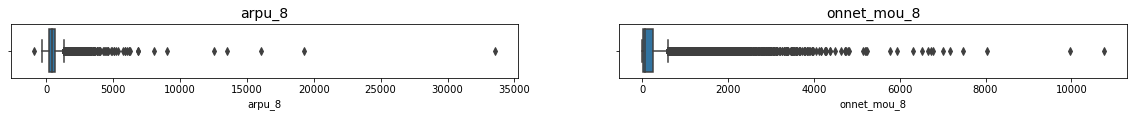

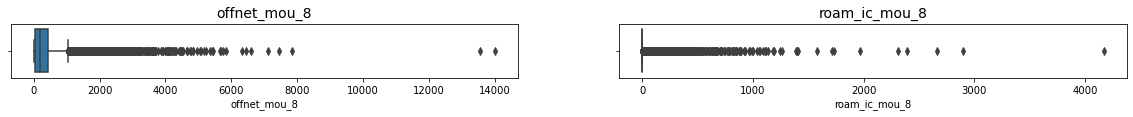

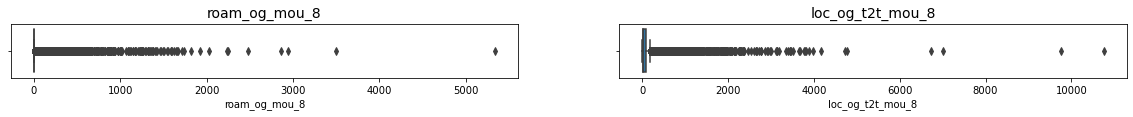

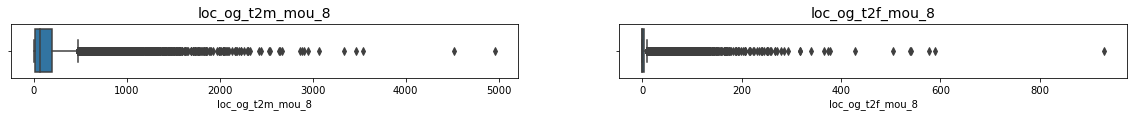

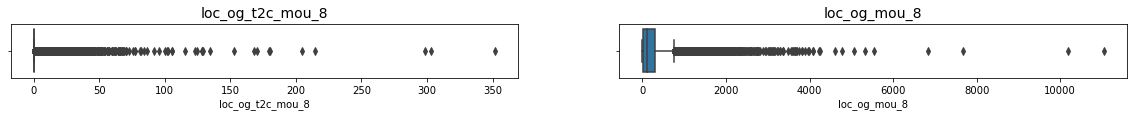

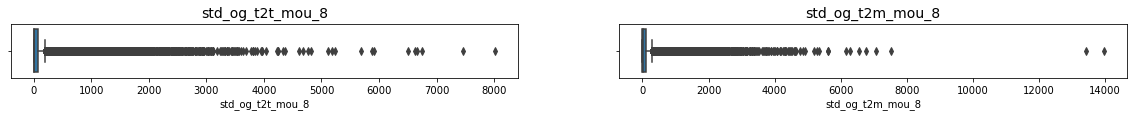

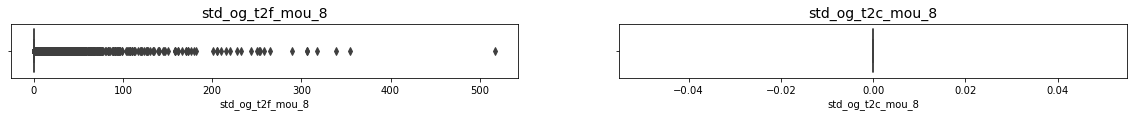

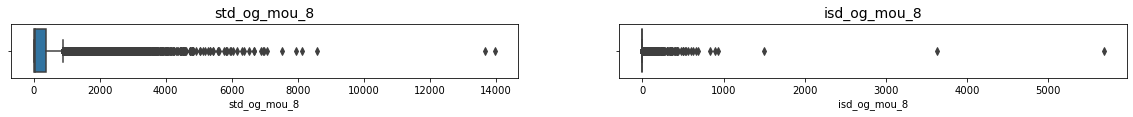

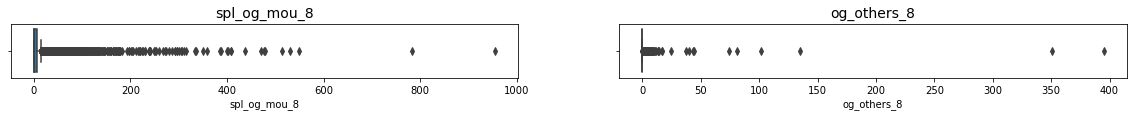

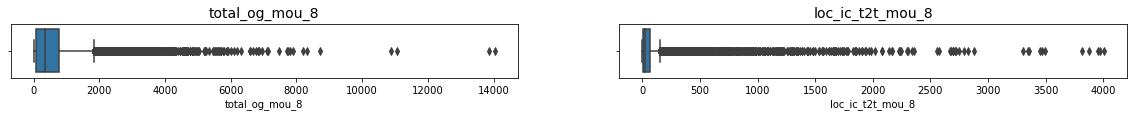

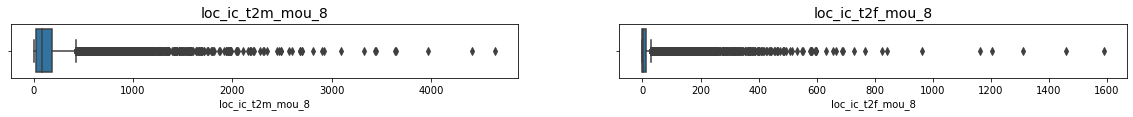

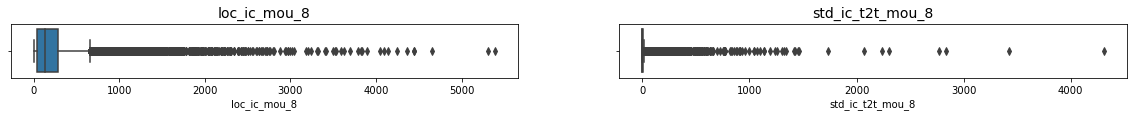

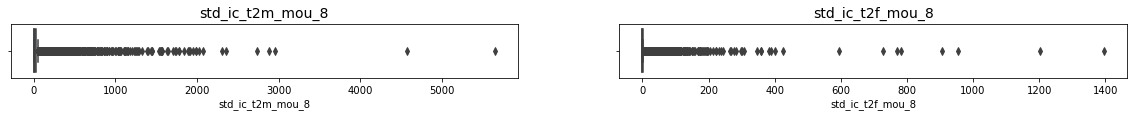

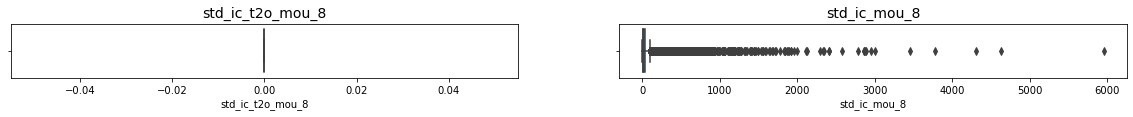

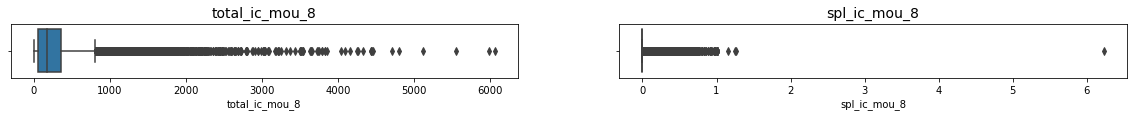

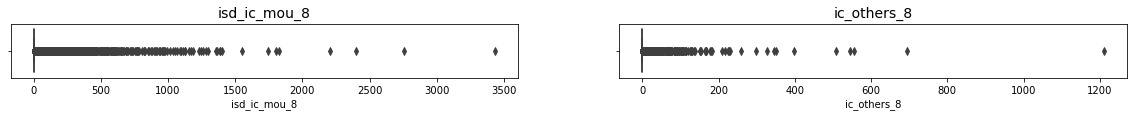

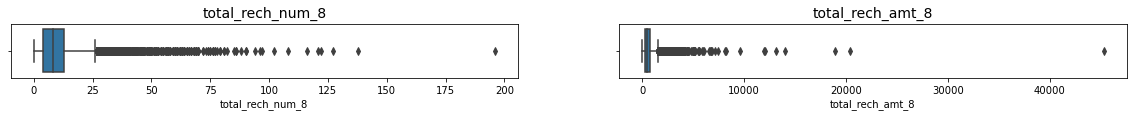

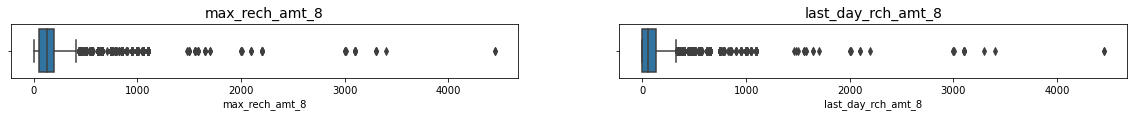

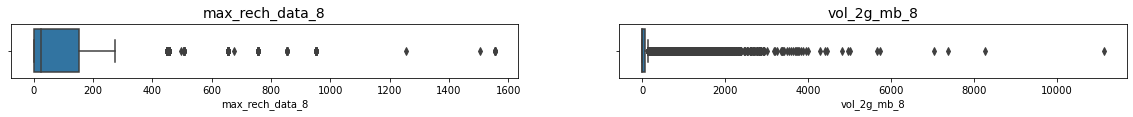

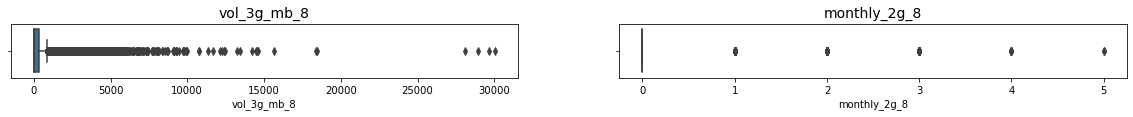

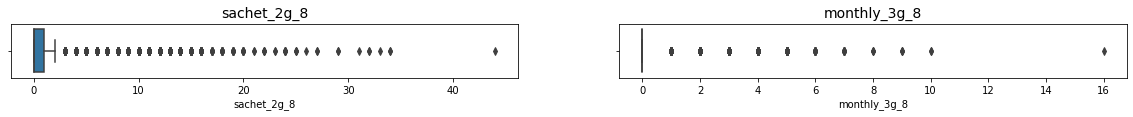

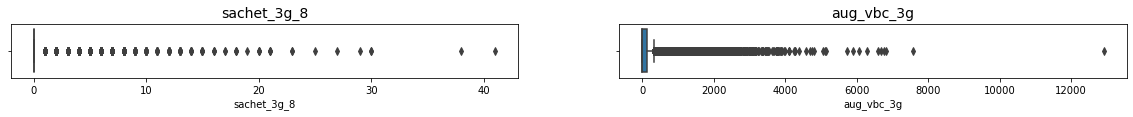

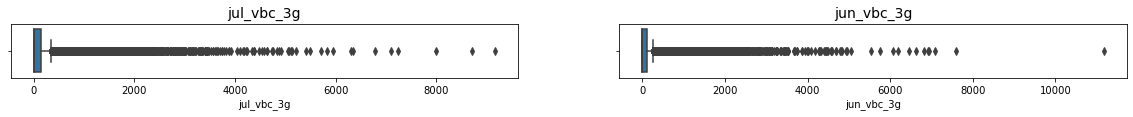

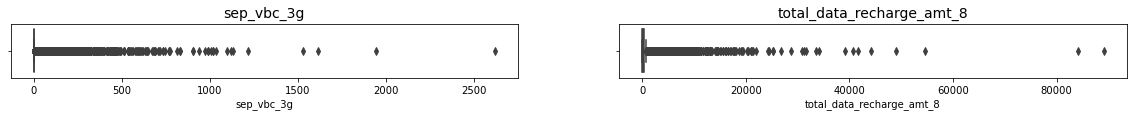

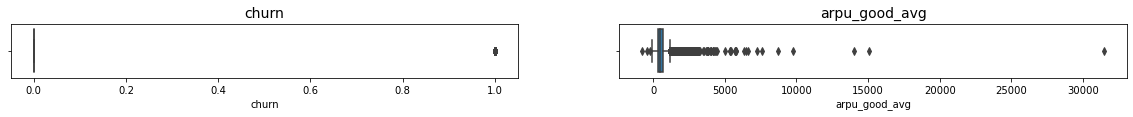

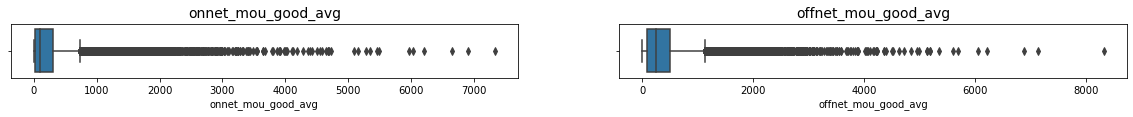

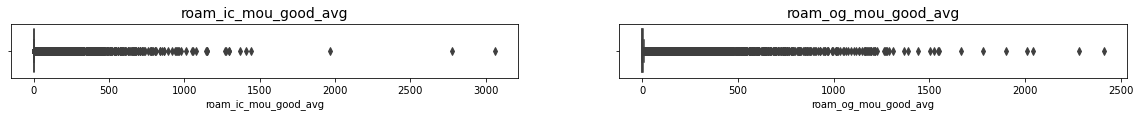

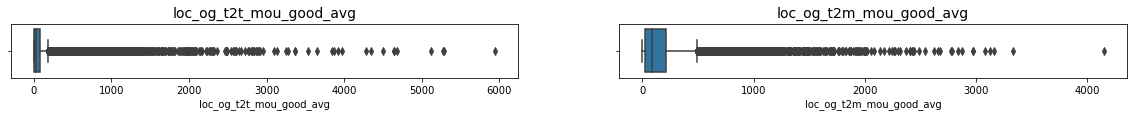

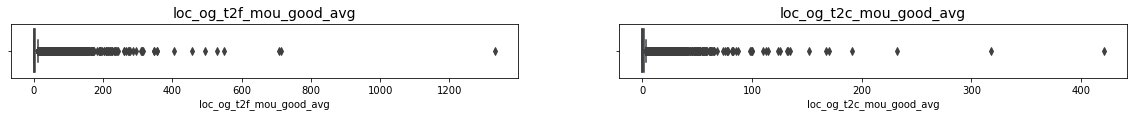

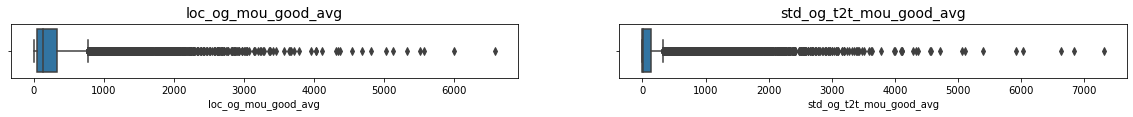

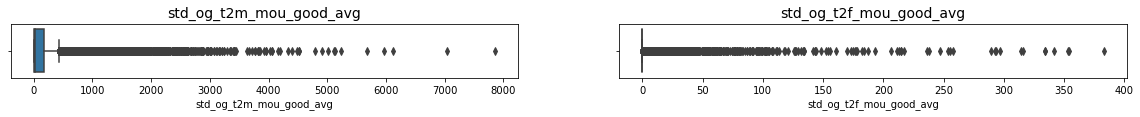

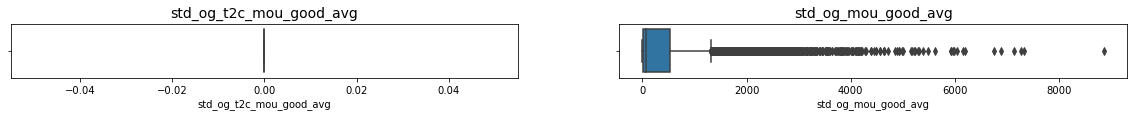

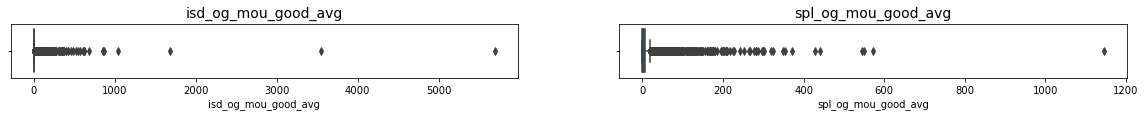

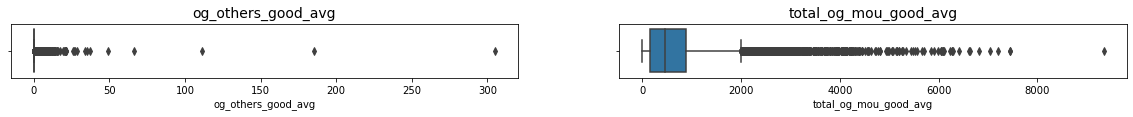

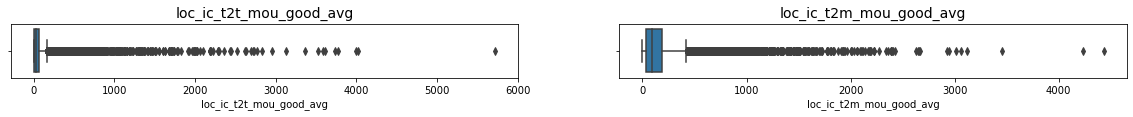

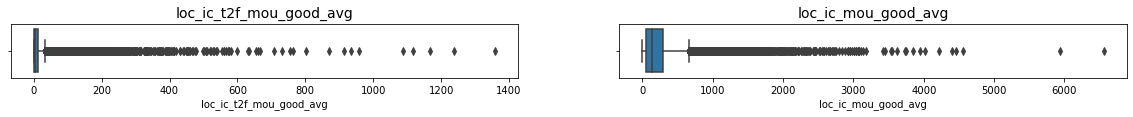

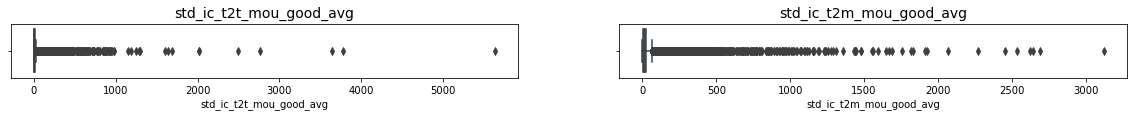

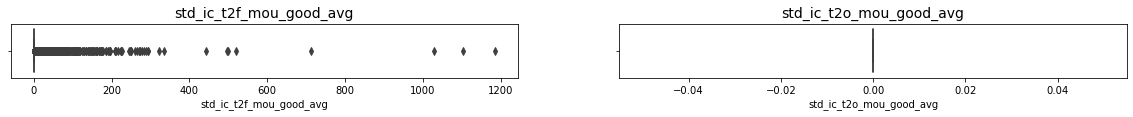

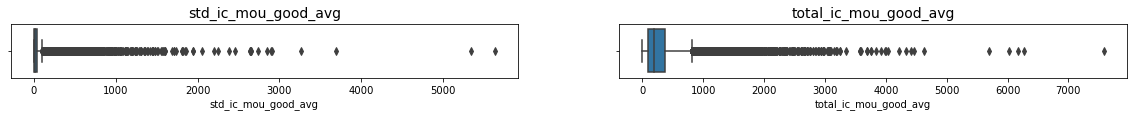

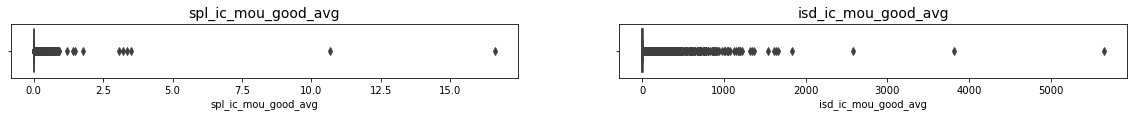

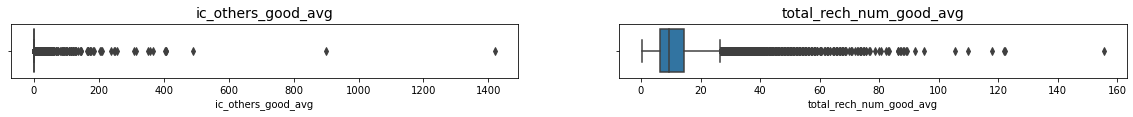

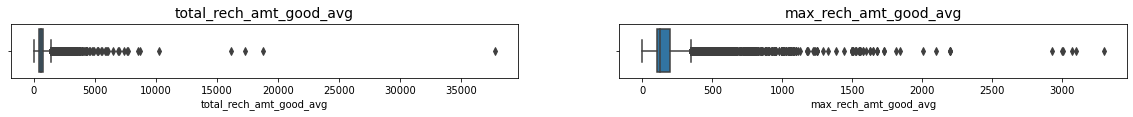

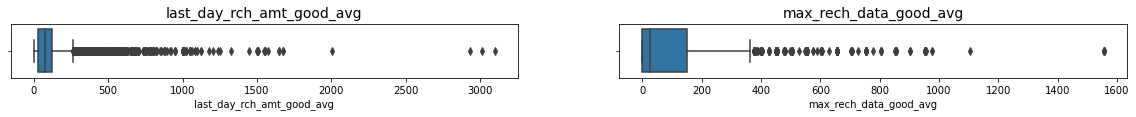

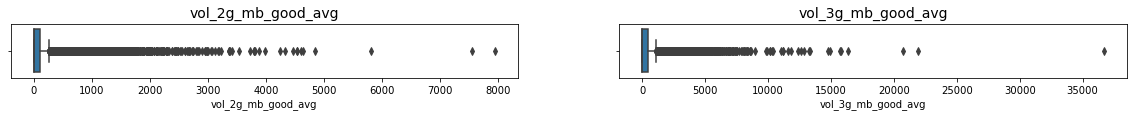

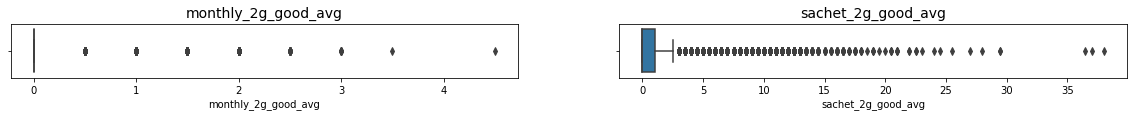

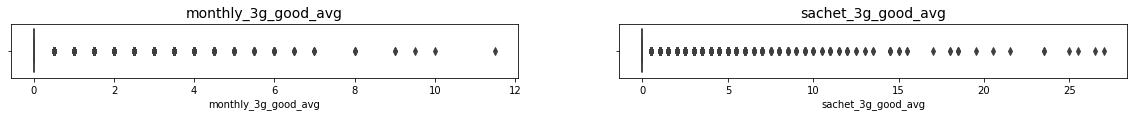

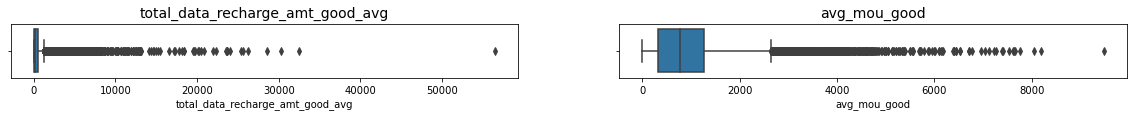

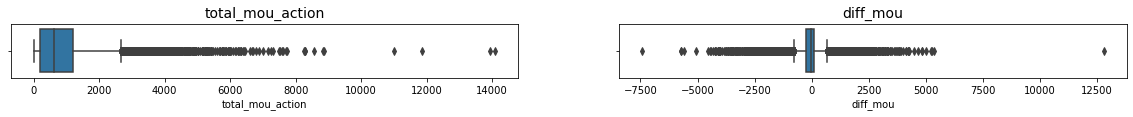

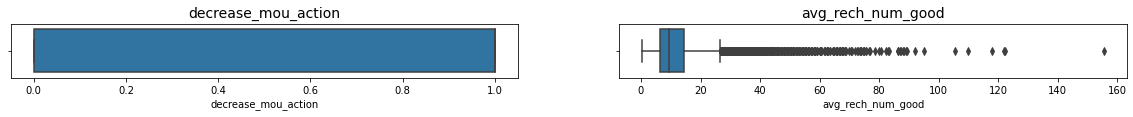

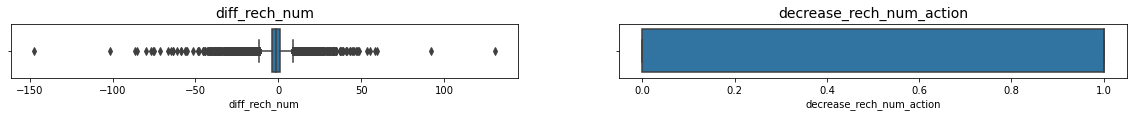

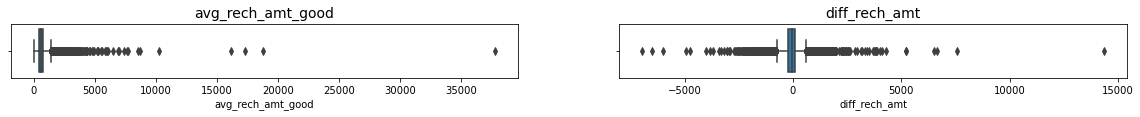

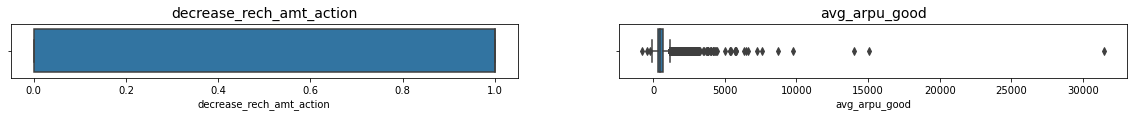

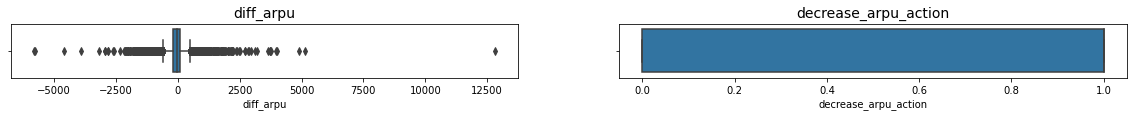

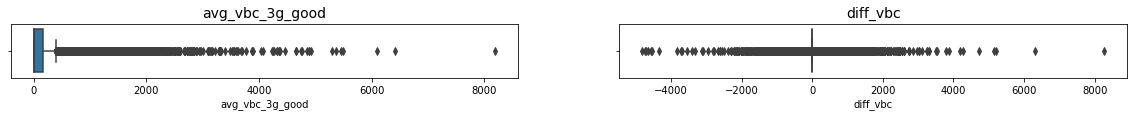

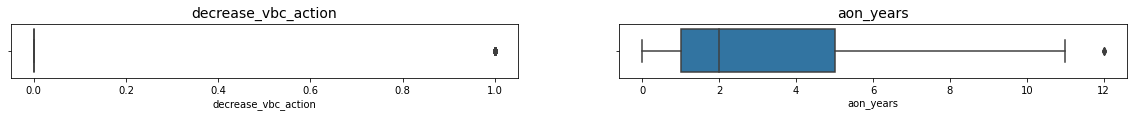

In [47]:
cols = HighValue_cust.columns
                               
for i in range(0,len(cols),2): 
    plt.figure(figsize=(20,1))
    
    plt.subplot(1,2,1)
    plt.title(cols[i], fontsize=14)        # column name as title
    sns.boxplot(x = cols[i], data = HighValue_cust)
    
    plt.subplot(1,2,2)
    plt.title(cols[i+1], fontsize=14)      # column name as title
    sns.boxplot(x = cols[i+1], data = HighValue_cust)
    plt.show()


Every column seem to have outliers. Instead of removing these rows, capping the outliers to the 95th percentile value

In [48]:
for col in cols:
    if col!="churn" and 'new_cols':                                 # Skipping to change the churn and new columns
        val = HighValue_cust[col].quantile(0.95)                    # get the value of each column's 95th percentile value
        HighValue_cust[col][HighValue_cust[col] >= val] = val       # assigning anything above the 95th percentile value to 95th percentile value

Plotting Boxplots again to check outliers

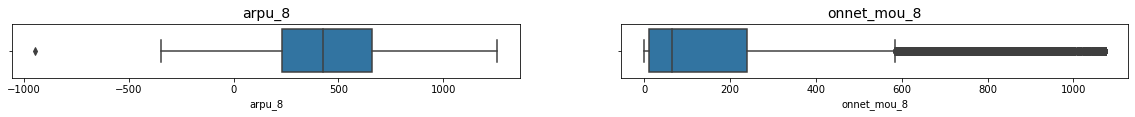

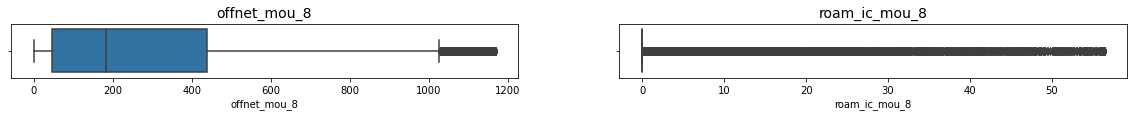

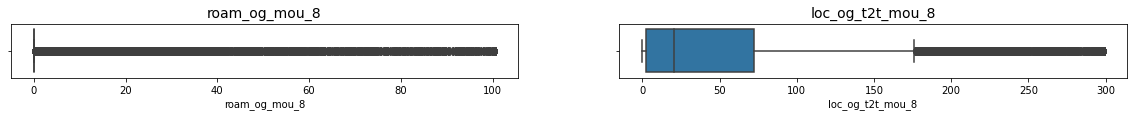

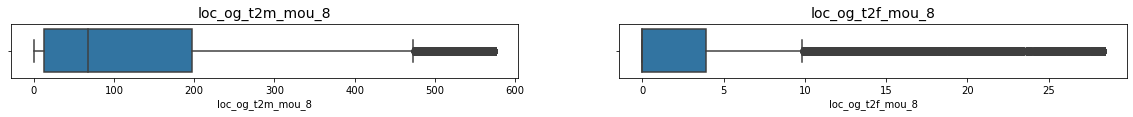

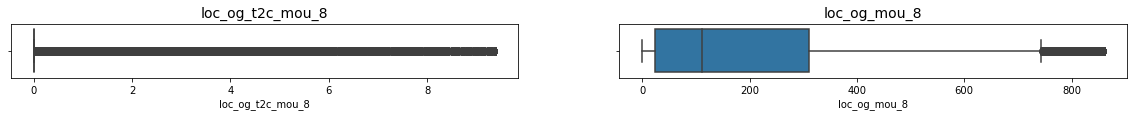

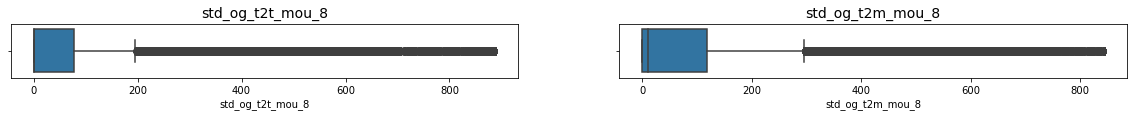

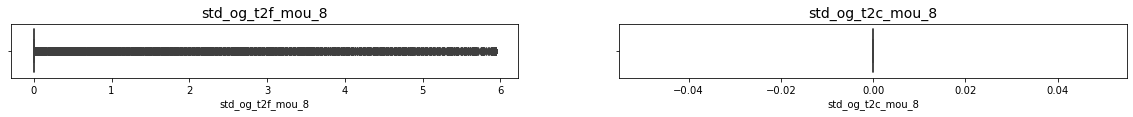

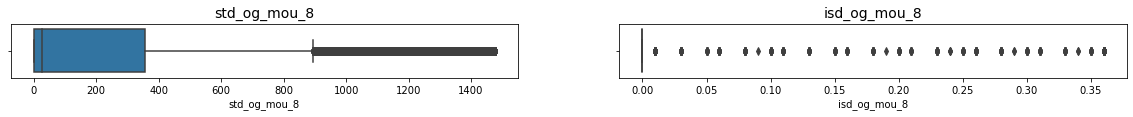

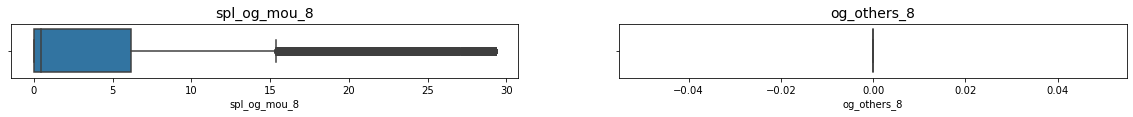

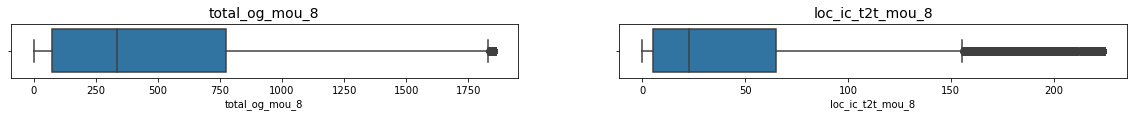

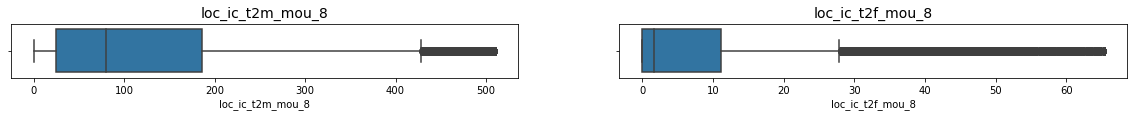

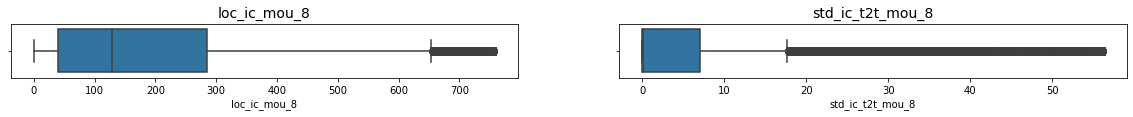

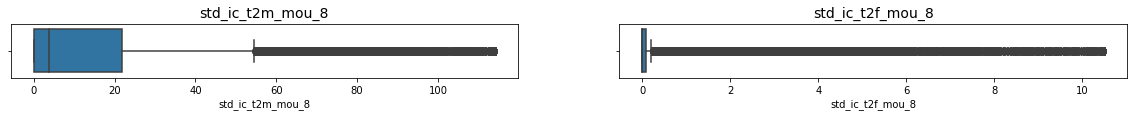

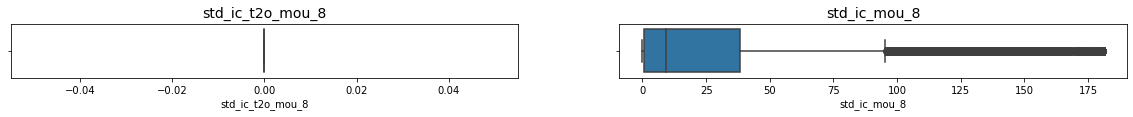

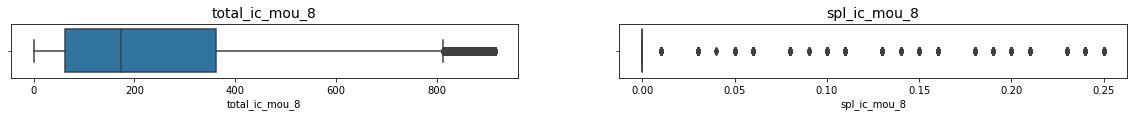

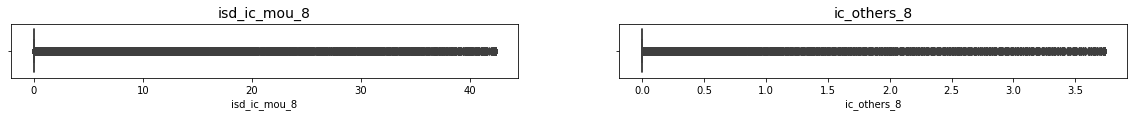

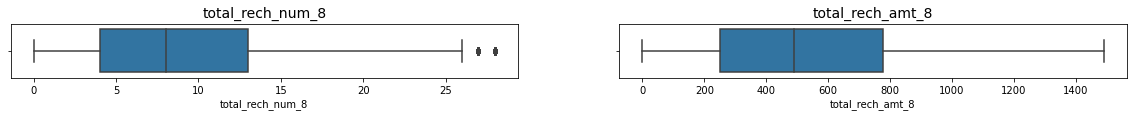

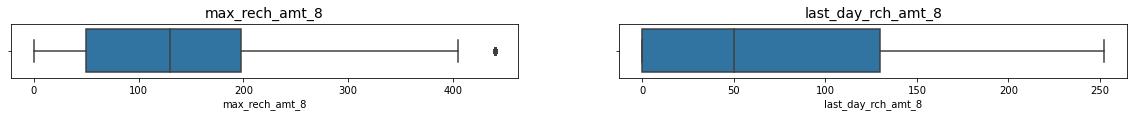

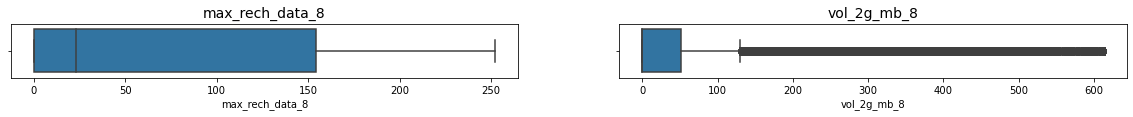

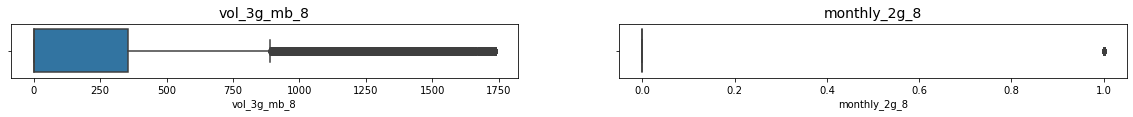

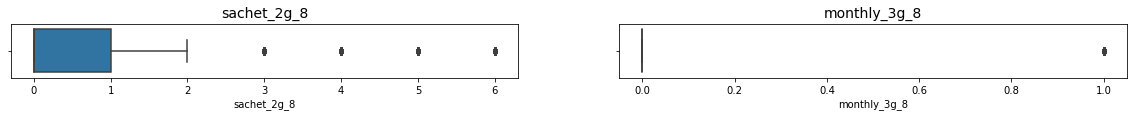

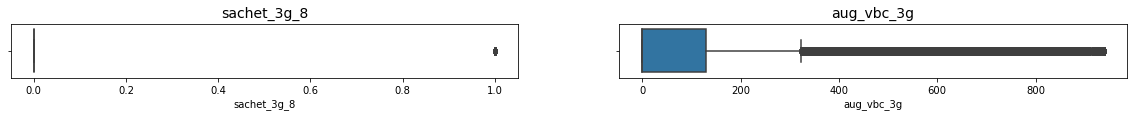

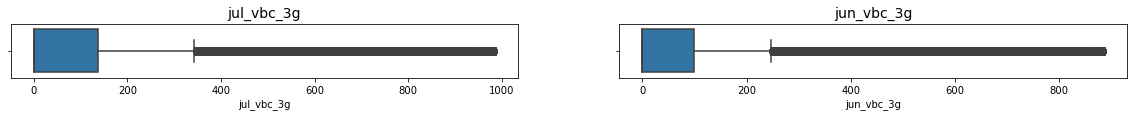

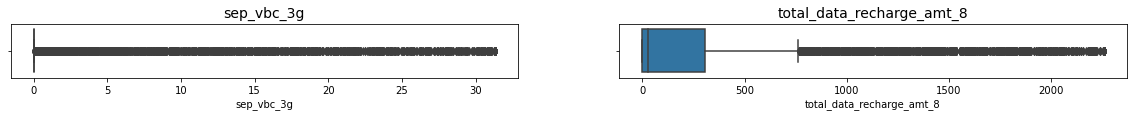

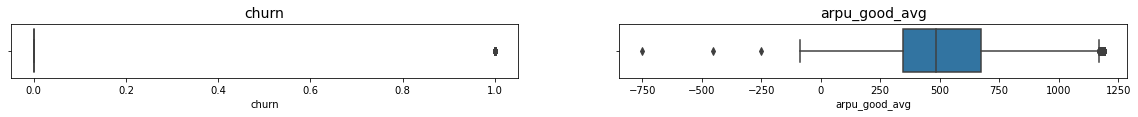

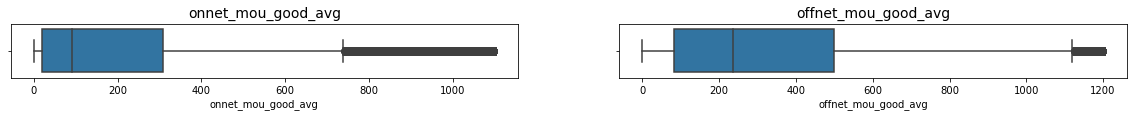

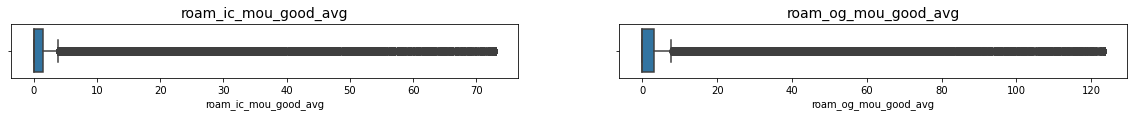

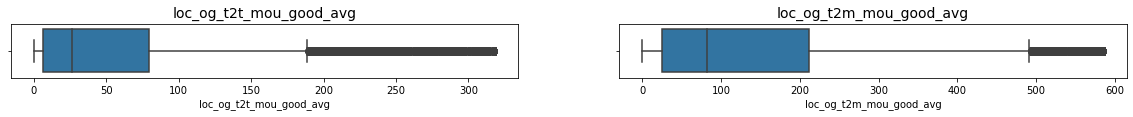

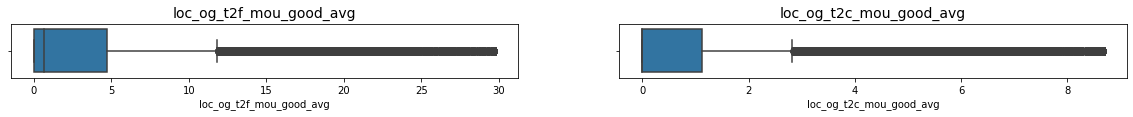

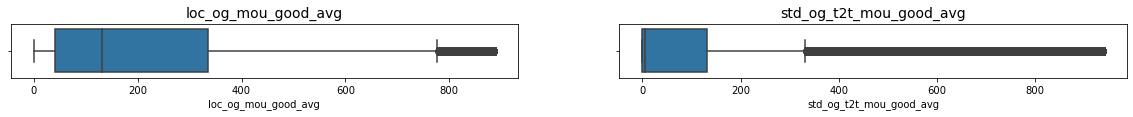

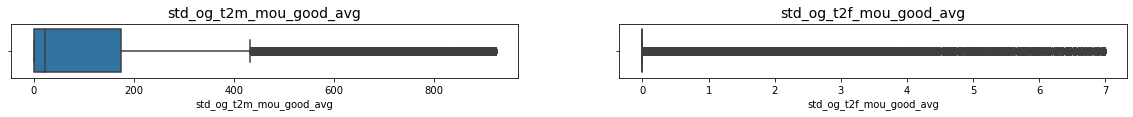

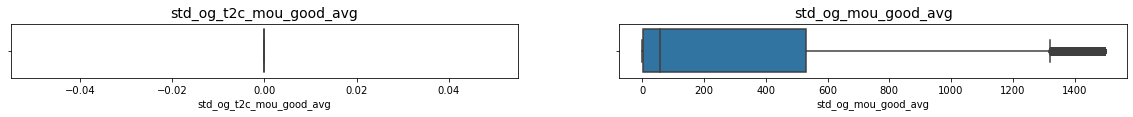

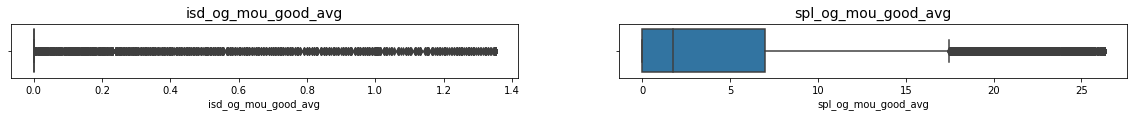

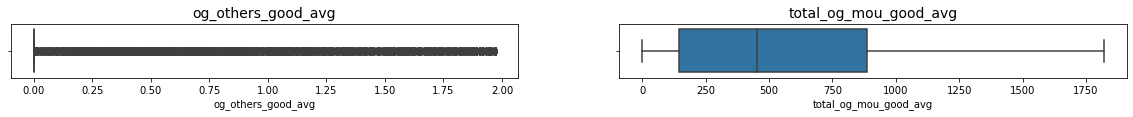

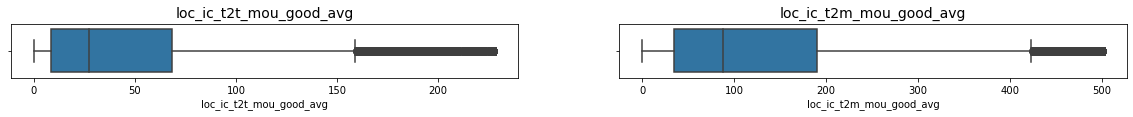

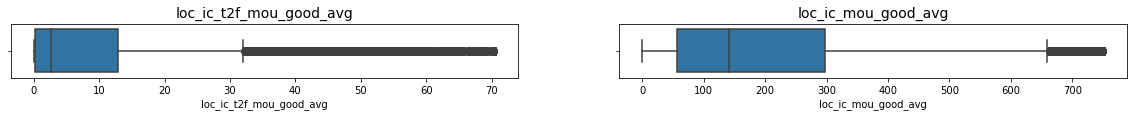

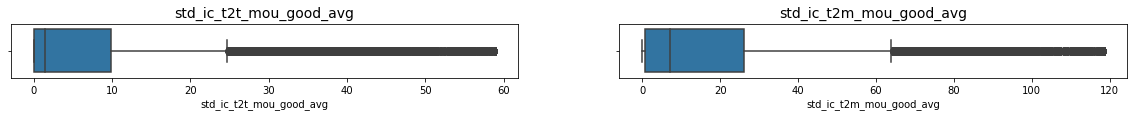

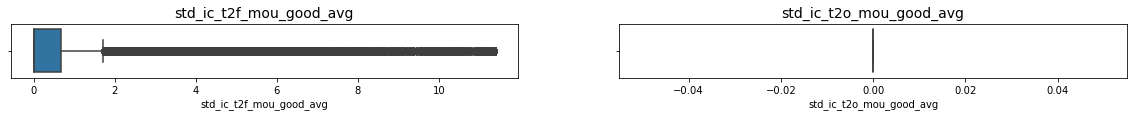

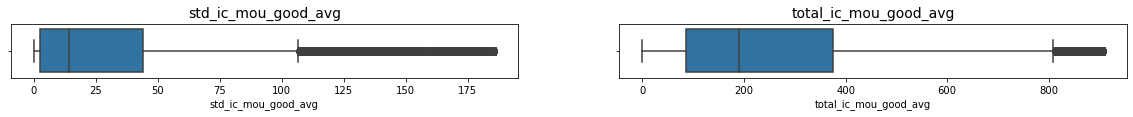

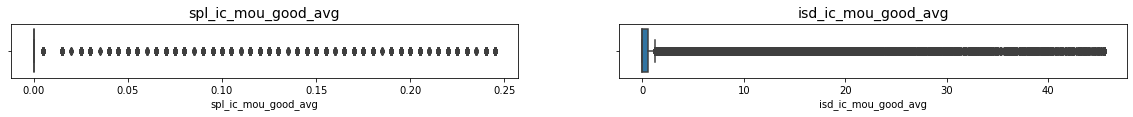

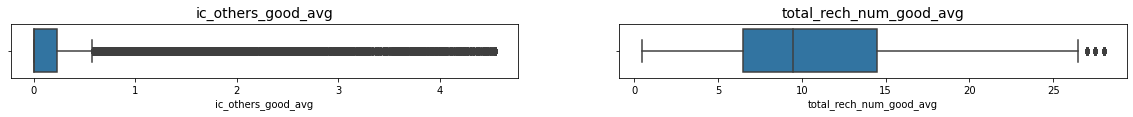

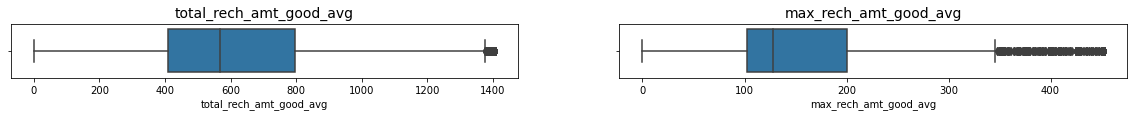

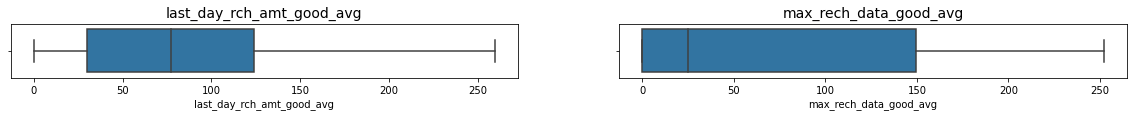

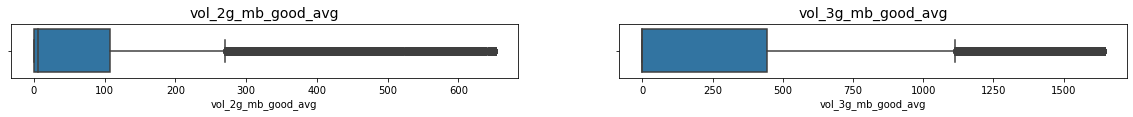

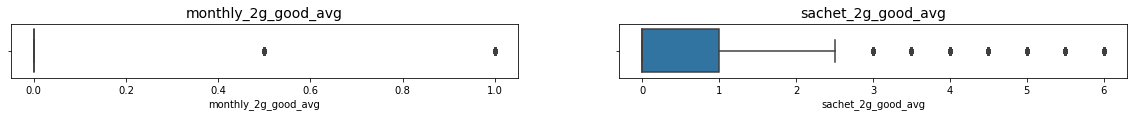

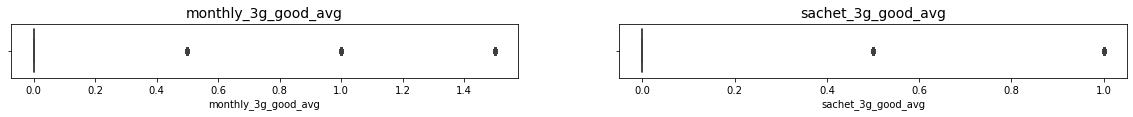

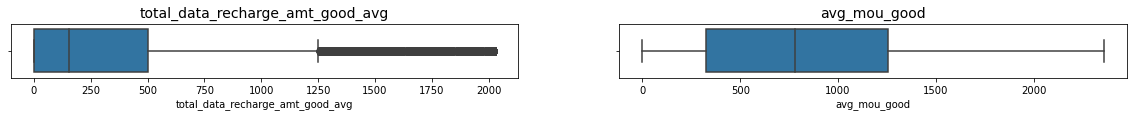

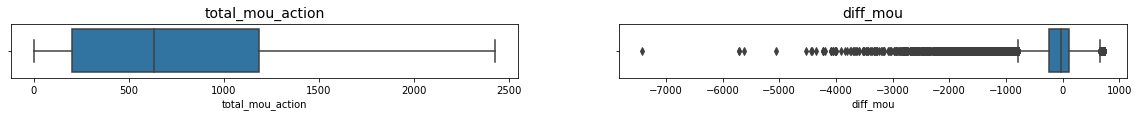

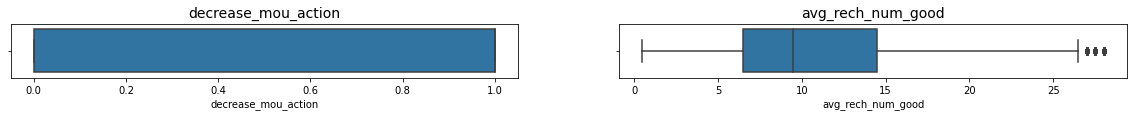

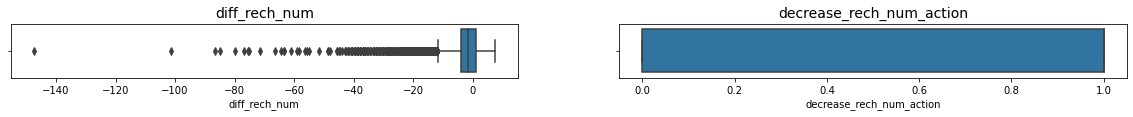

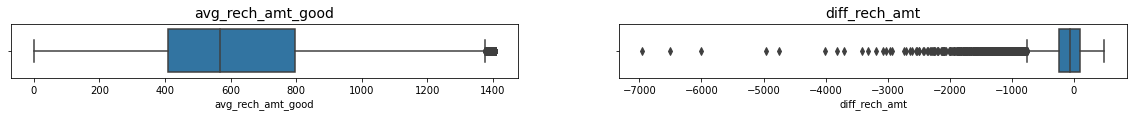

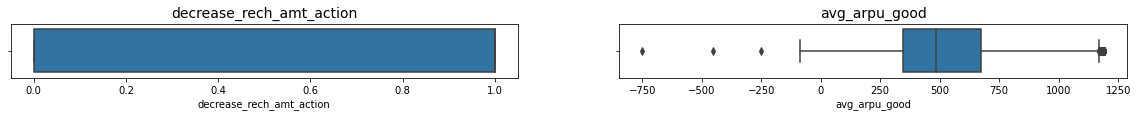

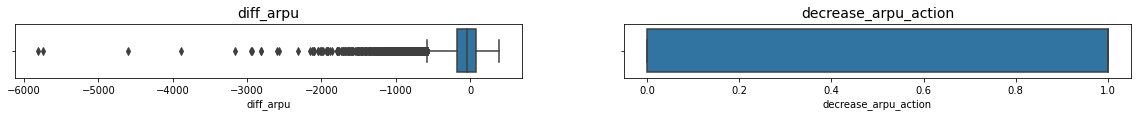

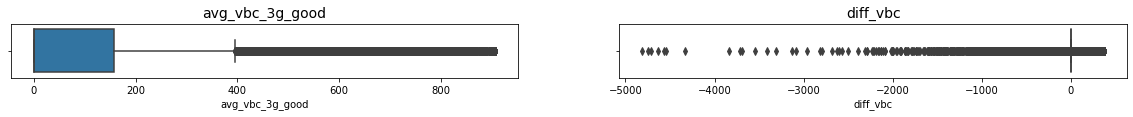

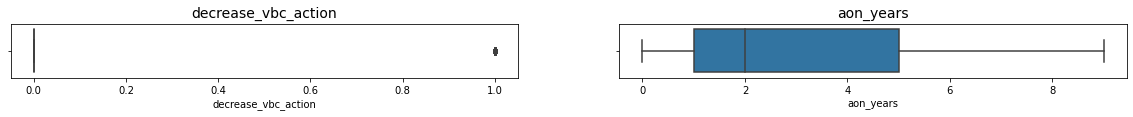

In [49]:
cols = HighValue_cust.columns

for i in range(0,len(cols),2):
    plt.figure(figsize=(20,1))
    plt.subplot(1,2,1)
    plt.title(cols[i], fontsize=14)
    sns.boxplot(x = cols[i], data = HighValue_cust)
    plt.subplot(1,2,2)
    plt.title(cols[i+1], fontsize=14)
    sns.boxplot(x = cols[i+1], data = HighValue_cust)
    plt.show()

- As we can see, few columns are highly skewed - 
 - roam_ic_mou_8, roam_og_mou_8, std_og_t2f_mou_8, std_og_t2c_mou_8, og_others_8, std_ic_t2f_mou_8, std_ic_t2o_mou_8, isd_ic_mou_8, ic_others_8, sep_vbc_3g, roam_ic_mou_good_avg, roam_og_mou_good_avg, std_og_t2f_mou_good_avg, std_og_t2c_mou_good_avg, isd_og_mou_good_avg, og_others_good_avg, std_ic_t2o_mou_good_avg, isd_ic_mou_good_avg
 
- Some columns also have outliers on the lower side which we will check later

In [50]:
HighValue_cust[["roam_ic_mou_8", "roam_og_mou_8", "std_og_t2f_mou_8", "std_og_t2c_mou_8", "og_others_8", 
               "std_ic_t2f_mou_8", "std_ic_t2o_mou_8", "isd_ic_mou_8", "ic_others_8", "sep_vbc_3g", "roam_ic_mou_good_avg", 
               "roam_og_mou_good_avg", "std_og_t2f_mou_good_avg", "std_og_t2c_mou_good_avg", "isd_og_mou_good_avg", "og_others_good_avg", 
               "std_ic_t2o_mou_good_avg", "isd_ic_mou_good_avg"]].describe(percentiles= (0.25,0.5,0.75,0.9,0.95,0.99))

,roam_ic_mou_8,roam_og_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,og_others_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,isd_ic_mou_8,ic_others_8,sep_vbc_3g,roam_ic_mou_good_avg,roam_og_mou_good_avg,std_og_t2f_mou_good_avg,std_og_t2c_mou_good_avg,isd_og_mou_good_avg,og_others_good_avg,std_ic_t2o_mou_good_avg,isd_ic_mou_good_avg
count,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.000000,30001.000000,30001.0,30001.000000
mean,4.791270,8.695463,0.473680,0.0,0.0,1.046577,0.0,3.841115,0.348694,2.178292,7.486915,13.242750,0.656585,0.0,0.092369,0.235833,0.0,4.495295
std,13.895008,25.057610,1.449762,0.0,0.0,2.659263,0.0,10.633981,0.925204,7.456537,18.637465,31.890265,1.753816,0.0,0.315867,0.536456,0.0,11.494882
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.0,0.080000,0.0,0.000000,0.000000,0.000000,1.525000,3.100000,0.000000,0.0,0.000000,0.000000,0.0,0.500000
90%,15.010000,28.880000,1.280000,0.0,0.0,3.780000,0.0,13.550000,1.130000,0.900000,28.035000,51.660000,2.330000,0.0,0.105000,1.045000,0.0,16.415000
95%,56.350000,100.510000,5.930000,0.0,0.0,10.490000,0.0,42.310000,3.730000,31.310000,72.920000,123.305000,6.975000,0.0,1.350000,1.970000,0.0,45.470000
99%,56.350000,100.510000,5.930000,0.0,0.0,10.490000,0.0,42.310000,3.730000,31.310000,72.920000,123.305000,6.975000,0.0,1.350000,1.970000,0.0,45.470000


For most of these columns atleast 75% values are same as Min or 0. So other values are not making much difference. Hence dropping all these columns except "roam_ic_mou_good_avg" and "roam_og_mou_good_avg"

In [51]:
HighValue_cust.drop(["roam_ic_mou_8", "roam_og_mou_8", "std_og_t2f_mou_8", "std_og_t2c_mou_8", "og_others_8", 
               "std_ic_t2f_mou_8", "std_ic_t2o_mou_8", "isd_ic_mou_8", "ic_others_8", "sep_vbc_3g", "std_og_t2f_mou_good_avg", "std_og_t2c_mou_good_avg", 
                "isd_og_mou_good_avg", "og_others_good_avg", "std_ic_t2o_mou_good_avg", "isd_ic_mou_good_avg"], axis=1, inplace=True)

In [52]:
HighValue_cust.shape

(30001, 94)

##### Handling attributes with outliers on lower side
 - arpu_8
 - arpu_good_avg

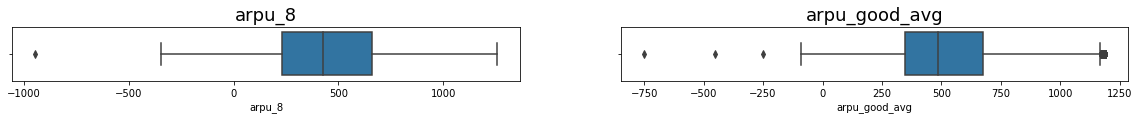

,arpu_8,arpu_good_avg
count,30001.000000,30001.000000
mean,480.242521,534.308127
std,331.409634,274.314912
min,-945.808000,-749.783000
0.1%,-5.000000,31.350000
1%,0.000000,83.726000
5%,9.550000,154.266000
10%,84.000000,213.807000
20%,190.594000,305.375000
25%,231.473000,345.289000


In [53]:
plt.figure(figsize=(20,1))

plt.subplot(1,2,1)
plt.title("arpu_8", fontsize=18)
sns.boxplot(x = "arpu_8", data = HighValue_cust)

plt.subplot(1,2,2)
plt.title("arpu_good_avg", fontsize=18)
sns.boxplot(x = "arpu_good_avg", data = HighValue_cust)

plt.show()

HighValue_cust[["arpu_8","arpu_good_avg"]].describe(percentiles= (0.001, 0.01, 0.05, 0.1, 0.2, 0.25,0.5,0.75))

Capping the lower value to 0.1% for both

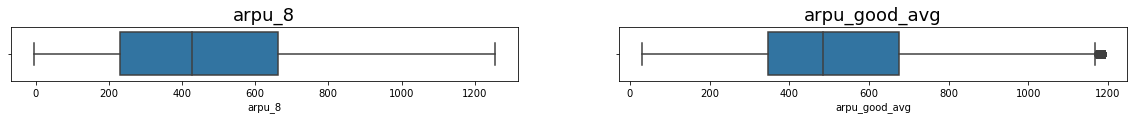

In [54]:
arpu_8_val = HighValue_cust["arpu_8"].quantile(0.001)
HighValue_cust["arpu_8"][HighValue_cust["arpu_8"] <= arpu_8_val] = arpu_8_val

arpu_good_avg_val = HighValue_cust["arpu_good_avg"].quantile(0.001)
HighValue_cust["arpu_good_avg"][HighValue_cust["arpu_good_avg"] <= arpu_good_avg_val] = arpu_good_avg_val

plt.figure(figsize=(20,1))

plt.subplot(1,2,1)
plt.title("arpu_8", fontsize=18)
sns.boxplot(x = "arpu_8", data = HighValue_cust)

plt.subplot(1,2,2)
plt.title("arpu_good_avg", fontsize=18)
sns.boxplot(x = "arpu_good_avg", data = HighValue_cust)

plt.show()

Outlier part looks handled now

## Exploratory Data Analysis

### Univariate analysis

#### aon_years ---> no. of years for which the customer is using network of operator T

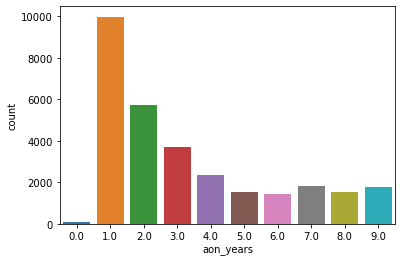

In [55]:
sns.countplot(x = 'aon_years', data = HighValue_cust)
plt.show()

Highest count is of customers who are using the services since 1 year, and there are even customers using it since 9 years

#### Churn rate - if customer dropped MOU in action phase

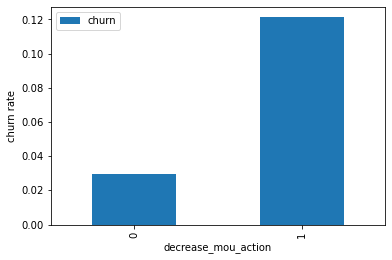

In [56]:
HighValue_cust.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Churn rate is more for the customers, whose minutes of usage decreased in the action phase

#### Churn rate - if customer dropped number of recharge in action phase

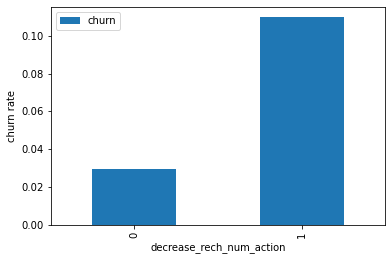

In [57]:
HighValue_cust.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Churn rate is more for customers whose number of recharges was dropped in action phase

#### Churn rate - if customer decreased volume based cost

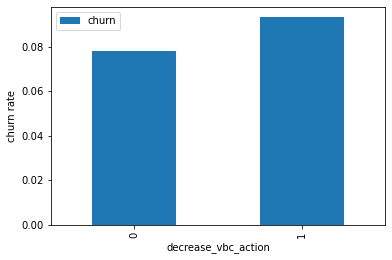

In [58]:
HighValue_cust.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### Bivariate Analysis

##### Churn rate by the decreasing recharge amount and number of recharge in the action phase

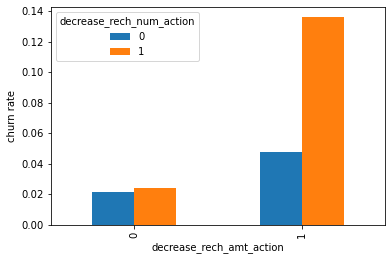

In [59]:
HighValue_cust.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Churn rate by the decreasing recharge amount and volume based cost in the action phase

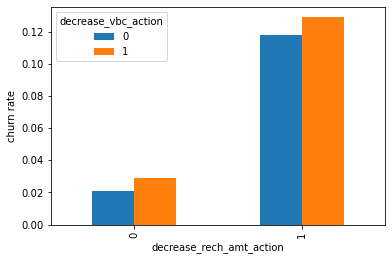

In [60]:
HighValue_cust.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost in the action month.

In [61]:
HighValue_cust.drop(['avg_mou_good', 'total_mou_action', 'diff_mou', 'decrease_mou_action', 'avg_rech_num_good', 'diff_rech_num', 'decrease_rech_num_action',
            'avg_rech_amt_good', 'diff_rech_amt', 'decrease_rech_amt_action', 'avg_arpu_good', 'diff_arpu', 'decrease_arpu_action',
            'avg_vbc_3g_good', 'diff_vbc','decrease_vbc_action'], axis = 1, inplace = True)

In [62]:
HighValue_cust.shape

(30001, 78)

## Multivariate Analysis

### Correlation heatmap

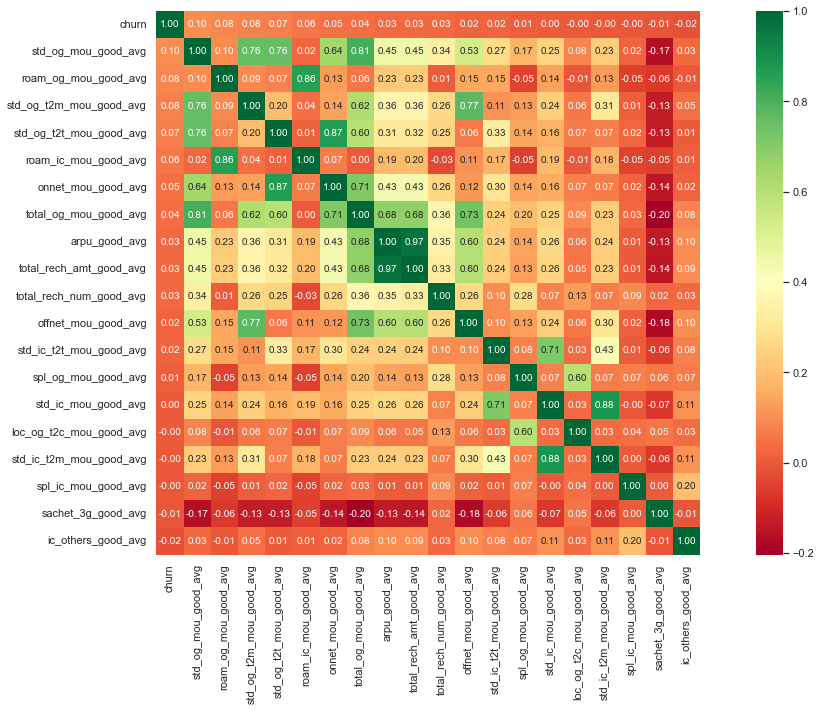

In [63]:
corr = HighValue_cust.corr()

plt.figure(figsize=[20,10])

k = 20        # number of variables for the heatmap

cols = corr.nlargest(k,'churn')['churn'].index
corrmatrix = np.corrcoef(HighValue_cust[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlGn')
plt.show()

- total_og_mou_good_avg has the highest correlation with most of the other attributes
- arpu_good_avg and total_rech_amt_good_avg has the highest correlation of 97%

In [64]:
HighValue_cust.shape

(30001, 78)

# Model Building

### Train - Test Split

In [65]:
# Using "stratify" to balance the target variable "churn" equally in train and test dataset

df_train, df_test = train_test_split(HighValue_cust, test_size=0.3, random_state=42, stratify=HighValue_cust.churn)

In [66]:
df_train.shape, df_test.shape

((21000, 78), (9001, 78))

In [67]:
df_train.churn.value_counts(normalize=True)

0    0.918619
1    0.081381
Name: churn, dtype: float64

In [68]:
df_test.churn.value_counts(normalize=True)

0    0.918676
1    0.081324
Name: churn, dtype: float64

In both, train and test datasets, the percentage of Churn and Non Churn cases is same, hence it is balanced in both datasets

In [69]:
X = HighValue_cust.drop(['churn'], axis=1)
y = HighValue_cust['churn']

In [70]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)
print("Dimension of y_train:", y_train.shape)
print("Dimension of y_test:", y_test.shape)

Dimension of X_train: (21000, 77)
Dimension of X_test: (9001, 77)
Dimension of y_train: (21000,)
Dimension of y_test: (9001,)


In [71]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Scaling - MinMax Scaler

In [72]:
 # Using MinMaxScaler() to scale all the features
    
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_recharge_amt_8,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_mou_good_avg,spl_og_mou_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,total_rech_amt_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,max_rech_data_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg,monthly_2g_good_avg,sachet_2g_good_avg,monthly_3g_good_avg,sachet_3g_good_avg,total_data_recharge_amt_good_avg,aon_years
65002,0.003968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.938189,0.802065,0.000000,0.483188,0.052294,0.010883,0.000000,0.000000,0.157987,0.018423,0.046738,0.0,0.070364,0.007738,0.000966,0.005461,0.000000,0.038809,0.113160,0.049748,0.047447,0.072094,0.133916,0.013422,0.866491,0.104000,0.080945,0.000000,0.000000,0.163636,0.375178,0.724558,0.385356,1.000000,0.030951,1.0,0.0,0.0,1.0,0.0,0.461140,0.333333
67088,0.334139,0.178291,0.229191,0.120256,0.133169,0.000000,0.000000,0.130824,0.070133,0.110532,0.105280,0.0,0.000000,0.144253,0.106049,0.320531,0.013015,0.247917,0.244136,0.028927,0.094102,0.225087,0.0,0.535714,0.311409,0.290909,0.079365,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.394997,0.168073,0.635134,0.385902,0.716678,0.160626,0.147189,0.000000,0.0,0.154677,0.132530,0.648911,0.483459,0.000000,0.472312,0.165947,0.274538,0.002482,0.234190,0.000000,0.369829,0.000000,0.235525,0.242697,0.632653,0.105611,0.381818,0.421053,0.265487,0.337187,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111
36410,0.226446,0.102076,0.150282,0.367126,0.230427,0.961958,0.049041,0.313406,0.000000,0.016943,0.009674,0.0,0.048156,0.153553,0.103152,0.100449,0.032307,0.100823,0.054016,0.074158,0.065938,0.107274,0.0,0.392857,0.194631,0.295455,0.000000,0.091270,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.367021,0.256426,0.104805,0.155676,0.000000,0.000000,0.332344,0.247740,0.674681,0.0,0.305163,0.010191,0.020873,0.019733,0.074419,0.166134,0.098209,0.082050,0.037376,0.088212,0.057999,0.047020,0.033377,0.050374,0.109621,0.000000,0.000000,0.400000,0.294097,0.265487,0.379576,0.091270,0.000000,0.0,0.0,0.5,0.0,0.0,0.113496,1.000000
90870,0.504818,0.079593,1.000000,0.013421,0.025245,0.000000,0.000000,0.021552,0.091846,1.000000,1.000000,0.0,0.453893,0.819615,0.032006,0.021753,0.000000,0.024098,0.002488,0.019109,0.012867,0.032096,0.0,0.500000,0.492617,0.327273,0.571429,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.529721,0.202378,0.900536,0.000000,0.000000,0.050489,0.105212,0.000000,0.0,0.087506,0.219981,1.000000,0.802091,1.000000,0.718146,0.035316,0.125295,0.000000,0.094503,0.209664,0.355605,0.029864,0.294688,0.148491,0.000000,0.863586,0.381818,0.546942,0.303097,0.296724,0.305556,0.772772,0.0,0.5,0.0,0.0,0.0,0.037997,0.111111
50581,0.138652,0.000000,0.028599,0.000000,0.014980,0.000000,0.488273,0.010014,0.00

In [73]:
X_test[cols] = scaler.transform(X_test[cols])

# confirming that the values are between 0 and 1 since we used MinMaxScaler

X_train.describe(percentiles=(0.25,0.5, 0.75,0.9,0.95)) 

,arpu_8,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_recharge_amt_8,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_mou_good_avg,spl_og_mou_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,total_rech_amt_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,max_rech_data_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg,monthly_2g_good_avg,sachet_2g_good_avg,monthly_3g_good_avg,sachet_3g_good_avg,total_data_recharge_amt_good_avg,aon_years
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,0.386269,0.185433,0.258699,0.189414,0.235238,0.142149,0.112737,0.244121,0.130552,0.147186,0.180826,0.057492,0.165871,0.274771,0.212534,0.254615,0.157314,0.263918,0.137553,0.163760,0.173252,0.277262,0.069324,0.337034,0.371145,0.333548,0.315373,0.265263,0.126554,0.156957,0.138143,0.142722,0.144524,0.087524,0.144808,0.144955,0.138273,0.145703,0.435489,0.213002,0.287758,0.102751,0.107356,0.197587,0.250401,0.151152,0.138679,0.258286,0.152429,0.167347,0.215631,0.192433,0.320074,0.225836,0.270076,0.161871,0.281049,0.152525,0.178456,0.113048,0.189628,0.296230,0.137999,0.106756,0.391139,0.449278,0.353553,0.348653,0.293497,0.154612,0.175498,0.162786,0.160607,0.127714,0.116929,0.186887,0.368312
std,0.264502,0.273834,0.281062,0.271184,0.283424,0.269337,0.268130,0.285600,0.270158,0.271628,0.291389,0.227921,0.276481,0.286229,0.272063,0.275692,0.271119,0.276638,0.267001,0.269836,0.267122,0.275716,0.241274,0.257358,0.270677,0.244596,0.323475,0.355921,0.267504,0.287830,0.345058,0.286501,0.351628,0.282608,0.283063,0.282576,0.279876,0.261949,0.237877,0.283747,0.279932,0.255598,0.258829,0.267616,0.279653,0.267730,0.272983,0.280813,0.283803,0.281043,0.303804,0.276597,0.285524,0.270561,0.272741,0.266708,0.274509,0.266463,0.267118,0.257908,0.266405,0.271642,0.287690,0.253205,0.242196,0.231681,0.230140,0.272267,0.335347,0.278451,0.292292,0.332442,0.290997,0.278848,0.286041,0.270279,0.283870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

## Building Predictive Models

### Logistics Regression (Interpretable model)

In [74]:
X_train_interpretable = X_train.copy()

logreg = LogisticRegression(class_weight= 'balanced') # as the churn (target variable) is imbalanced

rfe = RFE(logreg, 15) # getting top 15 columns from RFE to make the model
rfe = rfe.fit(X_train_interpretable,y_train)

rfe.support_

array([False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [75]:
list(zip(X_train_interpretable.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 3),
 ('onnet_mou_8', False, 56),
 ('offnet_mou_8', False, 51),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 47),
 ('loc_og_t2c_mou_8', False, 44),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 19),
 ('std_og_t2m_mou_8', False, 20),
 ('std_og_mou_8', False, 61),
 ('isd_og_mou_8', False, 26),
 ('spl_og_mou_8', False, 49),
 ('total_og_mou_8', False, 2),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', False, 34),
 ('std_ic_t2t_mou_8', False, 14),
 ('std_ic_t2m_mou_8', False, 27),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', False, 45),
 ('spl_ic_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 31),
 ('max_rech_amt_8', False, 39),
 ('last_day_rch_amt_8', True, 1),
 ('max_rech_data_8', False, 43),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_8', True, 1),
 ('monthly_2g_8', False, 18),
 ('sachet_2g_8', False, 8),
 ('monthly

In [76]:
# Get the top 15 features

col = X_train_interpretable.columns[rfe.support_]

### Model 1

In [77]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3815.6
Date:                Sun, 31 Jul 2022   Deviance:                       7631.3
Time:                        22:04:15   Pearson chi2:                 1.17e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5840      0.077     -7.577      0.000      -0.735      -0.433
loc_og_t2t_mou_8         -1.3731      0.523     -2.628      0.009      -2.397      -0.349
loc_og_t2m_mou_8         -2.3972      0.570     -4.208      0.000      -3.514      -1.281
loc_og_mou_8              1.2887      0.750      1.718      0.086      -0.182       2.759
loc_ic_t2t_mou_8         -1.7740      0.299     -5.927      0.000      -2.361      -1.187
loc_ic_t2m_mou_8         -3.6923      0.371     -9.948      0.000      -4.420      -2.965
loc_ic_t2f_mou_8         -1.2567      0.254     -4.957      0.000      -1.754      -0.760
std_ic_mou_8             -1.8099      0.194     -9.348      0.000      -2.189      -1.430
spl_ic_mou_8             -2.0874      0.276     -7.550      0.000      -2.629      -1.545
total_rech_num_8         -2.7481      0.171    -16.032      0.000      -3.084      -2.412
last_day_rch_amt_8       -1.9323      0.134    -14.436      0.000      -2.195      -1.670
vol_2g_mb_8              -2.0155      0.215     -9.358      0.000      -2.438      -1.593
vol_3g_mb_8              -2.0923      0.188    -11.123      0.000      -2.461      -1.724
arpu_good_avg             2.1245      0.140     15.179      0.000       1.850       2.399
total_ic_mou_good_avg     1.6607      0.175      9.510      0.000       1.318       2.003
aon_years                -0.8617      0.137     -6.277      0.000      -1.131      -0.593
=========================================================================================
"""

Checking VIF

In [78]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_8,34.97
1,loc_og_t2m_mou_8,19.78
0,loc_og_t2t_mou_8,9.25
13,total_ic_mou_good_avg,5.90
4,loc_ic_t2m_mou_8,5.65
12,arpu_good_avg,4.97
3,loc_ic_t2t_mou_8,3.76
8,total_rech_num_8,2.91
14,aon_years,2.59
9,last_day_rch_amt_8,2.39


Removing log_og_mou_8 as the feature has a high VIF value.

In [79]:
col = col.drop('loc_og_mou_8',1)

### Model 2

In [80]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm2 = sm.GLM(y_train, X_train_interpretable[col], family = sm.families.Binomial())
res = logm2.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3846.1
Date:                Sun, 31 Jul 2022   Deviance:                       7692.1
Time:                        22:04:16   Pearson chi2:                 2.22e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
loc_og_t2t_mou_8         -0.5790      0.275     -2.103      0.035      -1.119      -0.039
loc_og_t2m_mou_8         -1.4315      0.301     -4.763      0.000      -2.021      -0.843
loc_ic_t2t_mou_8         -1.8989      0.298     -6.364      0.000      -2.484      -1.314
loc_ic_t2m_mou_8         -3.8316      0.376    -10.194      0.000      -4.568      -3.095
loc_ic_t2f_mou_8         -1.1882      0.253     -4.701      0.000      -1.684      -0.693
std_ic_mou_8             -1.7672      0.194     -9.095      0.000      -2.148      -1.386
spl_ic_mou_8             -2.2504      0.279     -8.056      0.000      -2.798      -1.703
total_rech_num_8         -3.1230      0.171    -18.315      0.000      -3.457      -2.789
last_day_rch_amt_8       -1.9814      0.134    -14.805      0.000      -2.244      -1.719
vol_2g_mb_8              -2.2715      0.217    -10.447      0.000      -2.698      -1.845
vol_3g_mb_8              -2.3314      0.191    -12.228      0.000      -2.705      -1.958
arpu_good_avg             1.5527      0.119     13.021      0.000       1.319       1.786
total_ic_mou_good_avg     1.5092      0.176      8.574      0.000       1.164       1.854
aon_years                -1.3329      0.127    -10.533      0.000      -1.581      -1.085
=========================================================================================
"""

Checking VIF

In [81]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_ic_mou_good_avg,5.87
3,loc_ic_t2m_mou_8,5.62
11,arpu_good_avg,4.97
1,loc_og_t2m_mou_8,4.01
2,loc_ic_t2t_mou_8,3.73
0,loc_og_t2t_mou_8,3.22
7,total_rech_num_8,2.91
13,aon_years,2.58
8,last_day_rch_amt_8,2.39
4,loc_ic_t2f_mou_8,1.77


Dropping total_ic_mou_good_avg and loc_ic_t2m_mou_8 due to high VIF

In [82]:
col = col.drop("total_ic_mou_good_avg",1)

In [83]:
col = col.drop("loc_ic_t2m_mou_8",1)

In [84]:
col

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_good_avg',
       'aon_years'],
      dtype='object')

### Model 3

In [85]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3901.6
Date:                Sun, 31 Jul 2022   Deviance:                       7803.1
Time:                        22:04:18   Pearson chi2:                 7.28e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5362      0.075     -7.105      0.000      -0.684      -0.388
loc_og_t2t_mou_8      -0.5230      0.274     -1.906      0.057      -1.061       0.015
loc_og_t2m_mou_8      -3.0805      0.289    -10.673      0.000      -3.646      -2.515
loc_ic_t2t_mou_8      -2.0617      0.300     -6.880      0.000      -2.649      -1.474
loc_ic_t2f_mou_8      -1.5517      0.252     -6.167      0.000      -2.045      -1.059
std_ic_mou_8          -1.5655      0.193     -8.105      0.000      -1.944      -1.187
spl_ic_mou_8          -2.1638      0.278     -7.789      0.000      -2.708      -1.619
total_rech_num_8      -3.1805      0.170    -18.704      0.000      -3.514      -2.847
last_day_rch_amt_8    -2.0654      0.134    -15.460      0.000      -2.327      -1.804
vol_2g_mb_8           -2.0393      0.213     -9.562      0.000      -2.457      -1.621
vol_3g_mb_8           -2.2498      0.189    -11.914      0.000      -2.620      -1.880
arpu_good_avg          2.5393      0.134     18.967      0.000       2.277       2.802
aon_years             -0.8655      0.135     -6.406      0.000      -1.130      -0.601
======================================================================================
"""

Checking VIF

In [86]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,arpu_good_avg,4.50
0,loc_og_t2t_mou_8,3.15
2,loc_ic_t2t_mou_8,3.06
6,total_rech_num_8,2.83
1,loc_og_t2m_mou_8,2.71
11,aon_years,2.55
7,last_day_rch_amt_8,2.37
3,loc_ic_t2f_mou_8,1.63
4,std_ic_mou_8,1.54
9,vol_3g_mb_8,1.34


VIF are all <5, but p-value of "loc_og_t2t_mou_8" is >0.05. Hence dropping this column

In [87]:
col = col.drop("loc_og_t2t_mou_8",1)

### Model 4

In [88]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3903.5
Date:                Sun, 31 Jul 2022   Deviance:                       7807.0
Time:                        22:04:20   Pearson chi2:                 7.57e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5305      0.075     -7.036      0.000      -0.678      -0.383
loc_og_t2m_mou_8      -3.2435      0.278    -11.654      0.000      -3.789      -2.698
loc_ic_t2t_mou_8      -2.3290      0.270     -8.641      0.000      -2.857      -1.801
loc_ic_t2f_mou_8      -1.5475      0.251     -6.160      0.000      -2.040      -1.055
std_ic_mou_8          -1.5540      0.193     -8.054      0.000      -1.932      -1.176
spl_ic_mou_8          -2.1607      0.278     -7.781      0.000      -2.705      -1.616
total_rech_num_8      -3.2042      0.170    -18.848      0.000      -3.537      -2.871
last_day_rch_amt_8    -2.0777      0.133    -15.572      0.000      -2.339      -1.816
vol_2g_mb_8           -2.0269      0.213     -9.514      0.000      -2.444      -1.609
vol_3g_mb_8           -2.2403      0.189    -11.871      0.000      -2.610      -1.870
arpu_good_avg          2.5326      0.134     18.919      0.000       2.270       2.795
aon_years             -0.8701      0.135     -6.442      0.000      -1.135      -0.605
======================================================================================
"""

Checking VIF

In [89]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,arpu_good_avg,4.47
5,total_rech_num_8,2.83
10,aon_years,2.55
0,loc_og_t2m_mou_8,2.47
6,last_day_rch_amt_8,2.37
1,loc_ic_t2t_mou_8,2.05
2,loc_ic_t2f_mou_8,1.63
3,std_ic_mou_8,1.53
8,vol_3g_mb_8,1.33
7,vol_2g_mb_8,1.22


Since P-value for all features is lower than 0.05, and VIF is lower than 5, model has been created. Now predicting the training and test datasets

#### Prediction on Train dataset

In [90]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [91]:
y_train_pred_final = pd.DataFrame({'Churn' : y_train.values, 'Churn_Prob' : y_train_pred})

y_train_pred_final.head()

,Churn,Churn_Prob
0,1,0.543460
1,0,0.086780
2,0,0.041088
3,0,0.095225
4,0,0.026174


In [92]:
 # Using 0.5 as an example as the cut-off point
y_train_pred_final['predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# Checking head for the predicted value
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.543460,1
1,0,0.086780,0
2,0,0.041088,0
3,0,0.095225,0
4,0,0.026174,0


In [93]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.928952380952381


Overall accuracy of this model is 92%. 

#### Confusion Matrix, Sensitivity, Specificity

In [94]:
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"])
print(confusion)

[[19005   255]
 [ 1237   503]]


In [95]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [96]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("Specificity")
print(TN / float(TN + FP))

Sensitivity : 
0.28908045977011493
Specificity
0.9867601246105919


#### ROC Curve

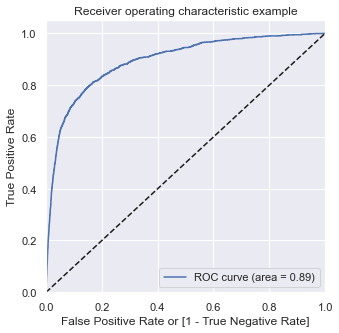

In [97]:
# function to draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"], drop_intermediate = False)


draw_roc(y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"])

Area under the curve is 0.89, which is very good. Sensitivity is really low, so will now find the optimal cut-off point to get better accuracy

#### Optimal Cut-Off Point

In [98]:
numbers = [float(i)/10 for i in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.543460,1,1,1,1,1,1,1,0,0,0,0
1,0,0.086780,0,1,0,0,0,0,0,0,0,0,0
2,0,0.041088,0,1,0,0,0,0,0,0,0,0,0
3,0,0.095225,0,1,0,0,0,0,0,0,0,0,0
4,0,0.026174,0,1,0,0,0,0,0,0,0,0,0


Now calculating accuracy, sensitivity and specificity for all the above cut-off points

In [99]:
cutoff_df = pd.DataFrame(columns = ["prob", "accuracy", "sensitivity", "specificity"])

numbers = [float(i)/10 for i in range(10)]

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    specificity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.082857     1.000000     0.000000
0.1   0.1  0.833381     0.805747     0.835877
0.2   0.2  0.900286     0.699425     0.918432
0.3   0.3  0.924476     0.605172     0.953323
0.4   0.4  0.930952     0.450000     0.974403
0.5   0.5  0.928952     0.289080     0.986760
0.6   0.6  0.924381     0.145977     0.994704
0.7   0.7  0.920857     0.073563     0.997404
0.8   0.8  0.919143     0.030460     0.999429
0.9   0.9  0.917143     0.000000     1.000000


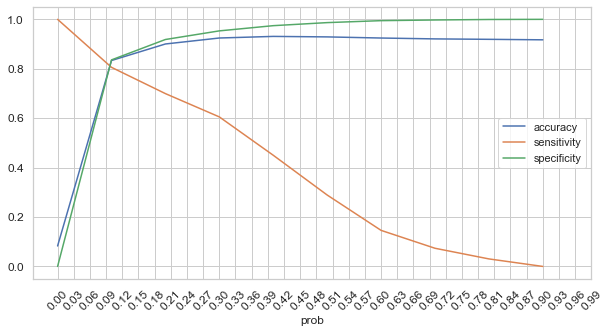

In [100]:
# Plotting accuracy, sensitivity and specificity for various possibilities above

sns.set_style("whitegrid") 

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'], figsize=(10,5))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.03), size = 12, rotation = 45)
plt.yticks(size = 12)
plt.show()

The optimal cut-off seems to be 0.1

In [101]:
y_train_pred_final["FinalPredicted"] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.1 else 0)

In [102]:
# Checking Accuracy, Confusion Matrix, Sensitivity and Specificity of the final predicted (i.e. cut-off point being 0.1)

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.FinalPredicted))

0.8333809523809523


In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"])
print(confusion)

[[16099  3161]
 [  338  1402]]


In [104]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [105]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("Specificity")
print(TN / float(TN + FP))

Sensitivity : 
0.8057471264367816
Specificity
0.835877466251298


##### Analysis : 
Even though the accuracy dropped, the sensitivity has increased vastly. In this case, high sensitivity is required since the prediction is for the users who would churn. With the optimal cut-off point of 0.1, we can predict more churned customers. Some may not churn, which is even better.

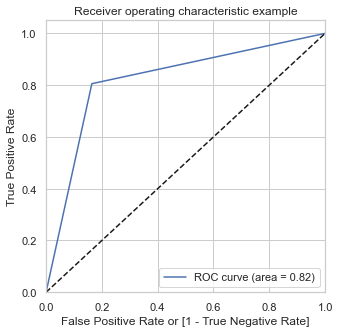

In [106]:
# function to draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"], drop_intermediate = False)


draw_roc(y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"])

#### Prediction on Test Dataset

In [107]:
X_test_interpretable = X_test.copy()

X_test_interpretable = X_test_interpretable[col]    # only the columns that we have from out training model
X_test_interpretable.head()

,loc_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,arpu_good_avg,aon_years
7526,0.486186,0.071279,0.183127,0.268058,0.0,0.321429,0.571429,0.004355,0.950174,0.503297,1.000000
74907,0.000000,0.000000,0.000000,0.000000,0.0,0.071429,0.000000,0.000000,0.000000,0.160752,0.111111
99617,0.000000,0.000000,0.000000,0.000000,0.0,0.035714,0.000000,0.000000,0.000000,0.290853,0.444444
83565,0.010161,0.057995,0.074414,0.020654,0.0,0.250000,0.119048,1.000000,0.420437,0.230894,0.333333
8695,0.083583,0.085098,0.500077,0.024906,0.0,0.071429,0.257937,0.040211,0.846116,0.434359,0.111111


In [108]:
X_test_sm = sm.add_constant(X_test_interpretable)

y_test_pred = res.predict(X_test_sm)


# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
7526,0.000983
74907,0.389606
99617,0.426765
83565,0.010269
8695,0.027897


In [109]:
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

,churn,Churn_Prob
0,0,0.000983
1,1,0.389606
2,0,0.426765
3,0,0.010269
4,0,0.027897


In [110]:
y_pred_final['FinalPredicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0) # as our cut-off point was 0.1, we'll use that to predict our test dataset as well
y_pred_final.head()

,churn,Churn_Prob,FinalPredicted
0,0,0.000983,0
1,1,0.389606,1
2,0,0.426765,1
3,0,0.010269,0
4,0,0.027897,0


#### Checking Accuracy, Confusion Matrix, Sensitivity and Specificity on the Test Dataset

In [111]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final["churn"], y_pred_final["FinalPredicted"])

0.8299077880235529

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final["churn"], y_pred_final["FinalPredicted"] )
confusion2

array([[6916, 1384],
       [ 147,  554]], dtype=int64)

In [113]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [114]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("Specificity")
print(TN / float(TN + FP))

Sensitivity : 
0.8057471264367816
Specificity
0.835877466251298


Comparing the training dataset and test dataset, below are the metrics:

- Accuracy for training : 83.33% and Accuracy for testing : 82.99%
- Sensitivity for training : 80.57% and Sensitivity for testing : 80.57%
- Specificity for training : 83.58% and Specificity for testing : 83.58%

#### Feature Importance

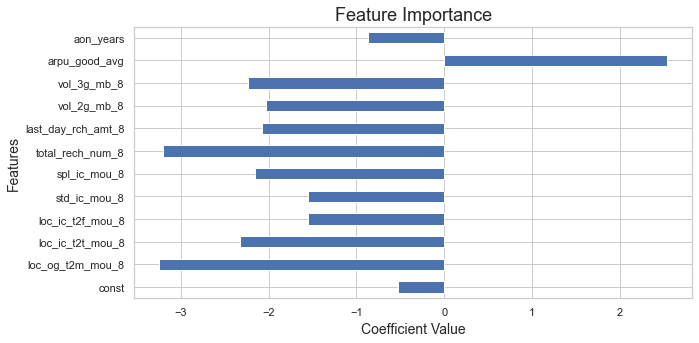

In [115]:
plt.figure(figsize = (10,5))
res.params.plot(kind = "barh")
plt.title("Feature Importance", fontsize = 18)
plt.ylabel("Features", fontsize = 14)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.show()

From the coefficient graph above, it can be observerd that the top 3 features to decide if a customer will churn or not are below:

- total_rech_num_8
- loc_og_t2m_mou_8
- loc_ic_t2t_mou_8

### Random Forest

In [116]:
rf = RandomForestClassifier(random_state = 42, class_weight = "balanced", n_jobs = -1, oob_score = True)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, oob_score=True,
                       random_state=42)

#### Performance on train set

In [117]:
y_train_pred = rf.predict(X_train)

acc=accuracy_score(y_train, y_train_pred)
f_1=f1_score(y_train, y_train_pred)
prec=precision_score(y_train, y_train_pred)
rec=recall_score(y_train, y_train_pred)

# classification report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19260
           1       1.00      1.00      1.00      1740

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



In [118]:
print('Accuracy of Random Forest on train data: ',acc)
print('F1 Score of Random Forest on train data: ',f_1)
print('Precision Score of Random Forest on train data: ',prec)
print('Recall Score of Random Forest on train data: ',rec)

Accuracy of Random Forest on train data:  1.0
F1 Score of Random Forest on train data:  1.0
Precision Score of Random Forest on train data:  1.0
Recall Score of Random Forest on train data:  1.0


#### Performance on unseen data

In [119]:
y_test_pred = rf.predict(X_test)

In [120]:
accuracy_score(y_test, y_test_pred)

0.946117098100211

In [121]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8300
           1       0.74      0.47      0.58       701

    accuracy                           0.95      9001
   macro avg       0.85      0.73      0.77      9001
weighted avg       0.94      0.95      0.94      9001



#### Cross Validation Score and OOB Score

In [122]:
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1)

array([0.83261905, 0.82952381, 0.825     , 0.82952381, 0.83357143])

In [123]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)

array([0.94404762, 0.9447619 , 0.94333333, 0.94047619, 0.94214286])

In [124]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1).mean()   # Cross Validation Score

0.9429523809523811

In [125]:
rf.oob_score_     # OOB Score

0.9417142857142857

OOB Score in RandomForest is somewhat similar to cross val score. OOB score shows the number of correctly predicted rows from the out of bag sample, and a high score is good sign

#### Hyper Parameter tuning

In [126]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [127]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [128]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [131]:
%%time

model_cv.fit(X_train, y_train)   # For model fitting (Please Note: This step is taking a lot of time, sometimes more than 3 hours (took 2hrs 40 mins here))

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Wall time: 2h 39min 56s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [132]:
model_cv.best_score_

0.9435714285714285

In [133]:
rf_best = model_cv.best_estimator_

rf_best

RandomForestClassifier(max_depth=5, max_features=11, min_samples_leaf=20,
                       n_jobs=-1, random_state=42)

In [134]:
# Build final model on best estimator of Grid search CV

rf_best.fit(X_train,y_train)

y_pred_train = rf_best.predict(X_train)
acc=accuracy_score(y_train, y_pred_train)
f_1=f1_score(y_train, y_pred_train)
prec=precision_score(y_train, y_pred_train)
rec=recall_score(y_train, y_pred_train)

In [135]:
print('Accuracy of Hyperparameter tuned Random Forest on train data: ',acc,'\n')
print('F1 Score of Hyperparameter tuned Random Forest on train data: ',f_1,'\n')
print('Precision Score of Hyperparameter tuned Random Forest on train data: ',prec,'\n')
print('Recall Score of Hyperparameter tuned Random Forest on train data: ',rec)

Accuracy of Hyperparameter tuned Random Forest on train data:  0.9441428571428572 

F1 Score of Hyperparameter tuned Random Forest on train data:  0.5931321540062434 

Precision Score of Hyperparameter tuned Random Forest on train data:  0.7480314960629921 

Recall Score of Hyperparameter tuned Random Forest on train data:  0.49137931034482757


In [136]:
# Prediction on test set

y_pred_test = rf_best.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8300
           1       0.71      0.50      0.58       701

    accuracy                           0.95      9001
   macro avg       0.84      0.74      0.78      9001
weighted avg       0.94      0.95      0.94      9001



In [137]:
print('Accuracy of Hyperparameter tuned Random Forest on test data: ',test_acc)

Accuracy of Hyperparameter tuned Random Forest on test data:  0.9452283079657816


## Conclusion:

Top 5 features impacting churn are:

1. loc_og_t2m_mou_8 : coefficient value = -3.24 
2. total_rech_num_8 : coefficient value = -3.20
3. loc_ic_t2t_mou_8 : coefficient value = -2.32
4. vol_3g_mb_8 : coefficient value = -2.24
5. spl_ic_mou_8 : coefficient value = -2.16

- Logistic Regression was the interpretable model to identify attributes affecting churn
- Logisitic Regression and Random Forest were performance models which gave high accuracy for both training and test datasets
- Accuracy after Hyper tuning of Random Forest is also good.

## Recommendations:

- Target the customers where number of incoming and outgoing calls is drastically reducing
- Decrease in data usage can also indicate a churn case and should be targetted for retention by giving data schemes
- Reduction of STD rates can help reduce churn rate
- Giving free local calls with same telecom operator
- Roaming charges can be reduced or certain plans can be given for roaming customer